# <center> <b><span style="color:black">Machine Learning Strategy For Detecting Cyber attacks on Industrial Control Systems  (ICS)     </b> </span></center>

## <b> <span><center>Tamir Suliman</b> </span></center>



---
## Problem Description 
In this notebook we looking in to detecting or predicting attacks on industrial control systems ICS using Machine Learning techniques.

## Project Outline: 
- Apply machine learning techniques to predict attacks on industrial systems using HAI-ICS time series dataset.
- Evaluate and analyze HAI dataset time series aspects ( stationary , seasonality ,etc ) and attributes to detect anomalies and thresholds.
- Visualize the process and the results using  different machine learning and statistical visualization techniques. 
- Apply different machine learning models such as  (VAR , ISOLATION FOREST, Logisitic Regression.. etc) and dimensionality reduction technique such as prinicpal component analysis (PCA) to make our prediction.

## Motivation

Industrial Control Systems (ICS) can be found in a variety of places, from automated manufacturing machinery to the cooling system of an office building.
ICS were formerly expected to be based on certain operating systems and communication protocols. However, in recent years, network connections based ICS is deplooyed on general-purpose operating systems and common communication protocols have decreased system development costs and increased productivity.
These threat actors and rogue states are frequently motivated by financial gain, political purpose, or even a military goal while carrying out assaults. State-sponsored attacks are possible, but so are attacks by competitors, insiders with a hostile intent, and even hacktivists.
As a result, the ability to detect abnormalities ahead of time and mitigate risks is a very useful capacity that allows for the prevention of not just cyber assaults, but also downtime, maintenance, and unscheduled downtime.

This problem presents another example of anomaly detection and binary classification predictive modeling.

## Overview of HAI Dataset: 
The HAI dataset was collected from a realistic industiral control system (ICS) testbed augmented with a Hardware-In-the-Loop (HIL) simulator that emulates steam-turbine power generation and pumped-storage hydropower generation.

The dataset contains several measurement channels (e.g., sensors, actuators, and control devices) that depict the current state of the systems.It's also available in two variants. 

We will be using the last version (21.03) which has a mixture of 20 attack scenarios and 33 interval data.HAI 21.03 was released in 2021, and is based on a more tightly coupled HIL simulator to produce clearer attack effects with additional attacks. 

The HAI dataset is currently available on the project github page which can be found at <b> (https://github.com/icsdataset/hai)</b>. The data is collected as part of a reseaarch to advance understanding of attack on ICS systems in South Korea. It's worth mentioning there is a comptetion 

The dataset attributes comprised from the followings:

1. <b>time</b> : This is the first column and it represents the observed local time as “yyyy-MM-dd hh:mm:ss,” while the rest columns provide the recorded SCADA data points - column 01 
2. <b>P1_B2004...P4_HT_LD </b>:  contains data collected from different setpoints and sensors in the process. These values are neumeric values.
3. <b>attack</b>: provides an info for whether an attack occured or not{1,0}. Where this is applicable to any attack happening on all the processes.last column.
    

    
### Identifying Important Attributes (Manual Anlysis of Technical Specs)

So analysis of the dataset attributes reveal the fact that there is 80 features. We know nomral scenarios involved operator using 4 controllers and 2 simulation models points (set points) .
We also know abnormal scenario occured when some of the parameters were not within the limits of the normal range or in unexpetded states due to attacks, malfunctions, and failures [1].

before we work on the dataset attributes and apply our models we need to prepare the dataset. There are  three attack types targeting those systems:

  - Setpoints attacks: Forcing setpoints value to change the controlle variables
  - Target points attacks: Forcing the control operator value directly.
  - Response Prevention attacks: Involves hiding abnormal response on Human Machine Interface HMI (dashboards)
    
Since our attacks scenarios involved attacking specific controllers that influence the system when different set points and target points values are changed according to the technical details document provided by HAI researchers. 

We could compile those data and consider the following attributes as good predictors

##### Set points & target points:
<table>
<tr><th>Table 1-Set points </th><th>Table 2-Target points (Attack)</th><th>Table 3-Description</th></tr>
<tr><td>
    
|No|Name|Description|
|---|---|---|
|1|P1_B2004| Set point (Controller P1-PC|
|2|P1_B3004| Set Point (Controller P1-LC|
|3|P1_B3005| Set Point (Controller P1-FC|
|4|P1_B4002| Set Point (Controller P1-TC|
|5|P4_ST_PS| Set Point (Controller P4-ST|
|6|P4_HT_PS| Set Point (Controller P4-HT|

</td><td>
    
|No|Name|Description|
|---|---|---|
|1|P2_VTR02| Target point |
|2|P1_B2016| Target Point |
|3|P1_LCV01D| Target Point|
|4|P1_FT03| Target Point |
|5|P1_FCV03D| Target Point |
|6|P2_VTR01| Target Point |
|7|P1_LIT01| Target Point |
|8|P1_B3004| Target Point |
|9|P1_PCV01D| Target Point |
|10|P1_PIT01| Target Point |
|11|P2_ASD| Target Point |
|12|P2_SIT01| Target Point |
|13|P2_LCV01D| Target Point |
|14|P3_LCP01D| Target Point |
|15|P2_CO_RPM| Target Point |
|16|P2_RTR| Target Point |
    
</td><td>

|No|Name|Unit|Description|
|---|---|---|---|
|1|P1_B2004|bar|Heat Exchanger Outlet Pressure set point|
|2|P1_B3004|mm|Water Level setpoint|
|3|P1_B3005|I/h|Discharge flowrate setpoint (return to water tank)|
|4|P1_B4002|C|Heat exchanger outlet temperature setpoint |
|5|P4_ST_PS|MW|Scheduled power demand of STM|
|6|P4_HT_PS|MW|Scheduled power demand of HTM|
|7|P2_VTR02|Um |Preset vigration limit for sensor |
|8|P1_B2016|bar|Pressure demand for thermal power output control|
|9|P1_PIT01|bar|Heat exchanger outlet pressure |
|10|P1_LCV01D|% |Position Command for LCV01 |
|11|P1_FT03| mmH2O|Measured flowrate of returnwater tank |
|12|P1_FCV01D|%|Position command for FC01 valve|
|13|P1_FCV03D|% |Position command for FCV03 valve|
|14|P2_VTR01|um |Preset vibration limit for sensor P2_VIBTR01 |
|15|P1_LIT01|%|Water level of the upper water tank|
|16|P3_LCP01D|-|Speed command for pump LCP01 |
|17|P2_RTR|RPM|RPM trip rate|
|18|P2_SIT01|RPM|Current turbine RPM measured by speed probe|
|19|P1_PCV01D|%|Position Command for valve PCV01 |
|20|P2_CO_rpm |-|Control output value of speed controller |
|20|P2_ASD|RPM| Auto Speed Demand|
|class|attack |-|Normal Condition = 0 / Abnomral Condition =1|
|index|time |YYYY-MM-DD HH:mm:ss|Date and time stamp|  
</td></tr> </table>

    
                        
                         
Using those attribute and setpoints will be the focus of our dataset.

Since the attack scenarios are configured based on the four variables of the feedback control loop , namely :
1. the set points (SP) , process variables (PV) , control variables CV and control parameters CP according to the technical details.

                        
                        

## Model Structure :

The diagram below illustrates our model pipeline :
<div>
<img src="images/ml-work.png" align="center" alt="Model Arch. Diagram"  width="800"/>
</div>

1. Loading the dataset and work on analyzing the data and the features.
2. Analayze the attributes and understand the process and the variables impact.
3. Clean the dataset
4. Statistical analysis & Data visualization 
5. Identifying time series components ( trends , seasonalities , etc )
6. Time series data tests & conversion ( ADF, causality , etc) 
7. Evaluate Machine Learning Models.


## <b><span style="color:blue">Installing Packages</b></span>
Uncomment the following line and paste it in to a codebox to install the packages:
```
* !pip install yellowbrick
* !pip install seaborn
* !pip install scipy
* !pip install statsmodels
* !pip install imbalanced-learn
* !pip install lightgbm
* !pip install xgboost
* !pip install yellowbrick

```







## <b><span style="color:blue">Import Libraries <b></span> 
    
Import some of the required libraries that we will need to build our solution.

In [1]:
# Main 
import os
import pandas as pd
import numpy as np
from pathlib import Path  
from datetime import date
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import seaborn as sns
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)
from matplotlib.dates import DateFormatter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# Data Preperation 
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from collections import Counter
import scipy.stats

import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson

# Algorithms 
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier 
from statsmodels.tsa.vector_ar.var_model import VAR
import lightgbm as lgb
import xgboost as x
import warnings
warnings.simplefilter('ignore')

## <span style="color:blue"><b>Loading the HAI Dataset </b></span>

The first step is data acquisition of the dataset.This contains the sensors reading from different parts of the system. The parse option is passed to the panda library to ensure the time column is classified as date time format.

We download the data from the github website then create a new dataset based on the predictors we identified.

In [2]:
# Load the dataset original
PATH = 'https://raw.githubusercontent.com/icsdataset/hai/master/hai-21.03/test2.csv.gz'
hai_data_orig = pd.read_csv(PATH, compression='gzip')

# Predictors Identified 

predictors = hai_data_orig[['time','P1_B2004','P1_B2016','P1_B3004','P1_B3005','P1_B4002',
                         'P1_FCV01D','P1_FCV03D','P1_FT03','P1_LCV01D','P1_LIT01',
                         'P1_PCV01D','P1_PIT01','P2_ASD','P2_CO_rpm','P2_RTR','P2_SIT01',
                         'P2_VTR01','P2_VTR02','P3_LCP01D','P4_HT_PS','P4_ST_PS','attack']]

In [3]:
# Create a dataset based on the important predictors 

filepath = Path('dataset/hai_datagen.csv')

# Save as CSV
predictors.to_csv(filepath, index=False)

# Generate two dataset dataframe one with index time and one with no neumeric index
hai_data = pd.read_csv(filepath,header=0,parse_dates=['time'], index_col='time') 
hai_data_r = pd.read_csv(filepath, parse_dates=['time'], header=0, index_col=0)

## <span style="color:blue"><b>Summarize the Data </b></span>

We show the first five rows of the dataset . As you can see the data has been properly loaded:

In [4]:
hai_data.head()

P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
time                                                                       
2020-07-09 15:00:00   0.09874   1.25036  382.21698  1118.61084      32.0   
2020-07-09 15:00:01   0.09874   1.24944  382.21698  1118.61084      32.0   
2020-07-09 15:00:02   0.09874   1.24746  382.21698  1118.61084      32.0   
2020-07-09 15:00:03   0.09874   1.24624  382.21698  1118.61084      32.0   
2020-07-09 15:00:04   0.09874   1.24364  382.21698  1118.61084      32.0   

                     P1_FCV01D  P1_FCV03D    P1_FT03  P1_LCV01D   P1_LIT01  \
time                                                                         
2020-07-09 15:00:00   92.69160   69.76647  315.48346   13.97231  384.30737   
2020-07-09 15:00:01   92.64934   69.74272  315.10199   13.93358  384.30737   
2020-07-09 15:00:02   92.91075   69.77000  316.05570   13.95248  384.20517   
2020-07-09 15:00:03   92.92407   69.70607  315.10199   13.89971  384.25626   
2020-07-09 15:00:04   93.05405   69.76971  315.48346   13.94603  384.20517   

                     ...  P2_ASD  P2_CO_rpm  P2_RTR  P2_SIT01  P2_VTR01  \
time                 ...                                                  
2020-07-09 15:00:00  ...       0    54065.0    2880     774.0        10   
2020-07-09 15:00:01  ...       0    54073.0    2880     773.0        10   
2020-07-09 15:00:02  ...       0    54073.0    2880     773.0        10   
2020-07-09 15:00:03  ...       0    54086.0    2880     777.0        10   
2020-07-09 15:00:04  ...       0    54086.0    2880     778.0        10   

                     P2_VTR02  P3_LCP01D  P4_HT_PS  P4_ST_PS  attack  
time                                                                  
2020-07-09 15:00:00        10        136         0         0       0  
2020-07-09 15:00:01        10        136         0         0       0  
2020-07-09 15:00:02        10        136         0         0       0  
2020-07-09 15:00:03        10        136         0         0       0  
2020-07-09 15:00:04        10        136         0         0       0  

[5 rows x 22 columns]

Preliminary data analysis is an essential part of any data science project for quality check and structure.So we start by looking at the data shape  and data types.

In [5]:
print("HAI Dataset Shape:", hai_data.shape)

HAI Dataset Shape: (118801, 22)


In [6]:
hai_data_r.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118801 entries, 2020-07-09 15:00:00 to 2020-07-11 00:00:00
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   P1_B2004   118801 non-null  float64
 1   P1_B2016   118801 non-null  float64
 2   P1_B3004   118801 non-null  float64
 3   P1_B3005   118801 non-null  float64
 4   P1_B4002   118801 non-null  float64
 5   P1_FCV01D  118801 non-null  float64
 6   P1_FCV03D  118801 non-null  float64
 7   P1_FT03    118801 non-null  float64
 8   P1_LCV01D  118801 non-null  float64
 9   P1_LIT01   118801 non-null  float64
 10  P1_PCV01D  118801 non-null  float64
 11  P1_PIT01   118801 non-null  float64
 12  P2_ASD     118801 non-null  int64  
 13  P2_CO_rpm  118801 non-null  float64
 14  P2_RTR     118801 non-null  int64  
 15  P2_SIT01   118801 non-null  float64
 16  P2_VTR01   118801 non-null  int64  
 17  P2_VTR02   118801 non-null  int64  
 18  P3_LCP01D  118801 non-null  in

Summary :

1. We loaded the dataset successfully using pandas csv module. 
2. Using technical specifications and manual analysis we were able to identify important predictors.
3. We created and loaded a new dataset that contains only the important predictors.
4. The dataset datatypes are all neumeric with no strings data.
5. The datset dimension comprised from 118000 records and 22 attributes /predictors.
6. The dataset is indexed by timestamp column and the timestamp column is parsed wiht no errors.

## <span style="color:blue"><b>Data Cleaning </b></span>
So before we visualize the dataset attributes and apply our models we need to clean the dataset  to remove redundant columns , remove duplicates and fix any other issues as follows:

### Drop Duplicates  

In [7]:
hai_data = hai_data.drop_duplicates()
hai_data_r = hai_data_r.drop_duplicates()

### Deleting Columns with Single Value & two values

In [8]:
hai_data_r.nunique()
print(hai_data.nunique())
# Deleting the variables
hai_data_r = hai_data_r.drop(['P2_ASD','P2_RTR','P2_VTR01','P2_VTR01','P2_VTR02','P4_ST_PS','P4_HT_PS'], axis = 1)
hai_data = hai_data.drop(['P2_ASD','P2_RTR','P2_VTR01','P2_VTR01','P2_VTR02','P4_ST_PS','P4_HT_PS'], axis = 1)
print(hai_data.columns)

P1_B2004         99
P1_B2016      18797
P1_B3004        119
P1_B3005        120
P1_B4002         96
P1_FCV01D     47326
P1_FCV03D    106100
P1_FT03        1890
P1_LCV01D    105385
P1_LIT01       3669
P1_PCV01D    110330
P1_PIT01       2094
P2_ASD            1
P2_CO_rpm      1060
P2_RTR            1
P2_SIT01        816
P2_VTR01          1
P2_VTR02          1
P3_LCP01D      1846
P4_HT_PS          2
P4_ST_PS          2
attack            2
dtype: int64
Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_FCV01D',
       'P1_FCV03D', 'P1_FT03', 'P1_LCV01D', 'P1_LIT01', 'P1_PCV01D',
       'P1_PIT01', 'P2_CO_rpm', 'P2_SIT01', 'P3_LCP01D', 'attack'],
      dtype='object')


In [9]:
hai_data.head()

P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
time                                                                       
2020-07-09 15:00:00   0.09874   1.25036  382.21698  1118.61084      32.0   
2020-07-09 15:00:01   0.09874   1.24944  382.21698  1118.61084      32.0   
2020-07-09 15:00:02   0.09874   1.24746  382.21698  1118.61084      32.0   
2020-07-09 15:00:03   0.09874   1.24624  382.21698  1118.61084      32.0   
2020-07-09 15:00:04   0.09874   1.24364  382.21698  1118.61084      32.0   

                     P1_FCV01D  P1_FCV03D    P1_FT03  P1_LCV01D   P1_LIT01  \
time                                                                         
2020-07-09 15:00:00   92.69160   69.76647  315.48346   13.97231  384.30737   
2020-07-09 15:00:01   92.64934   69.74272  315.10199   13.93358  384.30737   
2020-07-09 15:00:02   92.91075   69.77000  316.05570   13.95248  384.20517   
2020-07-09 15:00:03   92.92407   69.70607  315.10199   13.89971  384.25626   
2020-07-09 15:00:04   93.05405   69.76971  315.48346   13.94603  384.20517   

                     P1_PCV01D  P1_PIT01  P2_CO_rpm  P2_SIT01  P3_LCP01D  \
time                                                                       
2020-07-09 15:00:00   83.46329   1.35437    54065.0     774.0        136   
2020-07-09 15:00:01   83.40041   1.35437    54073.0     773.0        136   
2020-07-09 15:00:02   83.34054   1.35513    54073.0     773.0        136   
2020-07-09 15:00:03   83.26884   1.35513    54086.0     777.0        136   
2020-07-09 15:00:04   83.18826   1.35437    54086.0     778.0        136   

                     attack  
time                         
2020-07-09 15:00:00       0  
2020-07-09 15:00:01       0  
2020-07-09 15:00:02       0  
2020-07-09 15:00:03       0  
2020-07-09 15:00:04       0

In [10]:
hai_data.tail()

P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
time                                                                       
2020-07-10 23:59:56   0.10121   1.30608  397.63785  1001.99799   33.6555   
2020-07-10 23:59:57   0.10121   1.30226  397.63785  1001.99799   33.6555   
2020-07-10 23:59:58   0.10121   1.29707  397.63785  1001.99799   33.6555   
2020-07-10 23:59:59   0.10121   1.29906  397.63785  1001.99799   33.6555   
2020-07-11 00:00:00   0.10121   1.29784  397.63785  1001.99799   33.6555   

                     P1_FCV01D  P1_FCV03D    P1_FT03  P1_LCV01D   P1_LIT01  \
time                                                                         
2020-07-10 23:59:56      100.0   51.51111  246.24898    8.68301  395.19528   
2020-07-10 23:59:57      100.0   51.54862  246.43968    8.71395  395.19528   
2020-07-10 23:59:58      100.0   51.57135  246.24898    8.71927  395.24640   
2020-07-10 23:59:59      100.0   51.55929  246.05821    8.74994  395.19528   
2020-07-11 00:00:00      100.0   51.58201  246.43968    8.79882  395.19528   

                     P1_PCV01D  P1_PIT01  P2_CO_rpm  P2_SIT01  P3_LCP01D  \
time                                                                       
2020-07-10 23:59:56   39.21347   1.38260    54132.0     782.0      10240   
2020-07-10 23:59:57   39.14607   1.38184    54156.0     783.0      10424   
2020-07-10 23:59:58   39.11773   1.38031    54140.0     780.0      10592   
2020-07-10 23:59:59   39.07794   1.36887    54127.0     782.0      10752   
2020-07-11 00:00:00   39.09198   1.36810    54074.0     780.0      10832   

                     attack  
time                         
2020-07-10 23:59:56       0  
2020-07-10 23:59:57       0  
2020-07-10 23:59:58       0  
2020-07-10 23:59:59       0  
2020-07-11 00:00:00       0

In [11]:
# CREATE A CLEAN DATASET
#['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_FCV01D','P1_FCV03D', 'P1_FT03', 'P1_LCV01D', 'P1_LIT01', 'P1_PCV01D','P1_PIT01', 'P2_CO_rpm', 'P2_SIT01', 'P3_LCP01D', 'attack']

predictors_clean = hai_data[['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_FCV01D','P1_FCV03D', 'P1_FT03', 'P1_LCV01D', 'P1_LIT01', 'P1_PCV01D','P1_PIT01', 'P2_CO_rpm', 'P2_SIT01', 'P3_LCP01D', 'attack']]
filepath1 = Path('dataset/hai_dataclean.csv')

# Save as CSV
predictors_clean.to_csv(filepath1)

# Generate two dataset dataframe one with index time and one with no neumeric index
#hai_data_an = pd.read_csv(filepath,header=0,parse_dates=['time'], index_col='time') 
hai_data_an = pd.read_csv(filepath1, parse_dates=['time'], header=0, index_col=0)

In [12]:
hai_data_an.head()

P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
time                                                                       
2020-07-09 15:00:00   0.09874   1.25036  382.21698  1118.61084      32.0   
2020-07-09 15:00:01   0.09874   1.24944  382.21698  1118.61084      32.0   
2020-07-09 15:00:02   0.09874   1.24746  382.21698  1118.61084      32.0   
2020-07-09 15:00:03   0.09874   1.24624  382.21698  1118.61084      32.0   
2020-07-09 15:00:04   0.09874   1.24364  382.21698  1118.61084      32.0   

                     P1_FCV01D  P1_FCV03D    P1_FT03  P1_LCV01D   P1_LIT01  \
time                                                                         
2020-07-09 15:00:00   92.69160   69.76647  315.48346   13.97231  384.30737   
2020-07-09 15:00:01   92.64934   69.74272  315.10199   13.93358  384.30737   
2020-07-09 15:00:02   92.91075   69.77000  316.05570   13.95248  384.20517   
2020-07-09 15:00:03   92.92407   69.70607  315.10199   13.89971  384.25626   
2020-07-09 15:00:04   93.05405   69.76971  315.48346   13.94603  384.20517   

                     P1_PCV01D  P1_PIT01  P2_CO_rpm  P2_SIT01  P3_LCP01D  \
time                                                                       
2020-07-09 15:00:00   83.46329   1.35437    54065.0     774.0        136   
2020-07-09 15:00:01   83.40041   1.35437    54073.0     773.0        136   
2020-07-09 15:00:02   83.34054   1.35513    54073.0     773.0        136   
2020-07-09 15:00:03   83.26884   1.35513    54086.0     777.0        136   
2020-07-09 15:00:04   83.18826   1.35437    54086.0     778.0        136   

                     attack  
time                         
2020-07-09 15:00:00       0  
2020-07-09 15:00:01       0  
2020-07-09 15:00:02       0  
2020-07-09 15:00:03       0  
2020-07-09 15:00:04       0

## <span style="color:blue"><b>Understanding the Data </b></span>

### Descriprtive statistics

Let’s summarize the distribution of each attribute.We will generate summary stats for the data, identifying missing values categorical features , and count the number of distinct values by feature.
We will start by using Descriptive Statistics in Data Exploration to  take a closer look at our loaded data.

In [13]:
hai_data.describe().T

count          mean          std          min          25%  \
P1_B2004   118801.0      0.100169     0.001146      0.09804      0.09874   
P1_B2016   118801.0      1.395836     0.128718      1.03394      1.32271   
P1_B3004   118801.0    398.345730    10.159895    382.21698    396.06302   
P1_B3005   118801.0   1066.996483    43.182916    994.63568   1001.99799   
P1_B4002   118801.0     32.598745     0.676369     31.60939     32.00000   
P1_FCV01D  118801.0     63.135366    42.196864      0.00000     15.93327   
P1_FCV03D  118801.0     58.676109     5.307163     32.63621     52.01071   
P1_FT03    118801.0    285.119269    25.315659    120.17726    248.15624   
P1_LCV01D  118801.0     12.345037     4.812710      0.00000      9.62797   
P1_LIT01   118801.0    398.866841    13.557286    162.61324    394.78638   
P1_PCV01D  118801.0     67.740877    19.890980      0.00000     49.75690   
P1_PIT01   118801.0      1.386082     0.073331      0.09781      1.36429   
P2_CO_rpm  118801.0  54100.049301   110.417793  51648.00000  54092.00000   
P2_SIT01   118801.0    781.593362    33.335821      0.00000    780.00000   
P3_LCP01D  118801.0   4636.928410  5128.592987     -8.00000     72.00000   
attack     118801.0      0.029032     0.167896      0.00000      0.00000   

                   50%          75%          max  
P1_B2004       0.10048      0.10121      0.10136  
P1_B2016       1.39155      1.46739      1.99702  
P1_B3004     396.06302    405.69220    423.35199  
P1_B3005    1085.58936   1094.34485   1118.61084  
P1_B4002      32.61500     33.18550     33.65550  
P1_FCV01D    100.00000    100.00000    100.00000  
P1_FCV03D     60.67887     61.72814     91.43527  
P1_FT03      296.21991    301.36957    351.21292  
P1_LCV01D     13.11805     13.94771     97.00000  
P1_LIT01     397.64893    405.77649    552.07324  
P1_PCV01D     67.29684     84.54195    100.00000  
P1_PIT01       1.38336      1.39709      2.41943  
P2_CO_rpm  54106.00000  54119.00000  54758.00000  
P2_SIT01     784.00000    786.00000    895.00000  
P3_LCP01D   1976.00000   9680.00000  20592.00000  
attack         0.00000      0.00000      1.00000

### Class Distribution
We look at the number of instances of the class.

In [14]:
# class distribution
print(hai_data.groupby('attack').size())

attack
0    115352
1      3449
dtype: int64



## <span style="color:blue"><b>Data Analysis & Visualization</b></span>

### Exploratory Data Visualization (EDA)

Although we could go ahead and dive into the modeling, there are plenty of insights that can be gained just by exploring the dataset further.
Let's plot the dataset to have a feel of what each value or predictor looks like. We are using matplotlib to plot the data. There are probably based on my visual inspection of the graphs below that couple of variables have some correlation. 

Boxplots indicate outliers on some of the sensors readings.

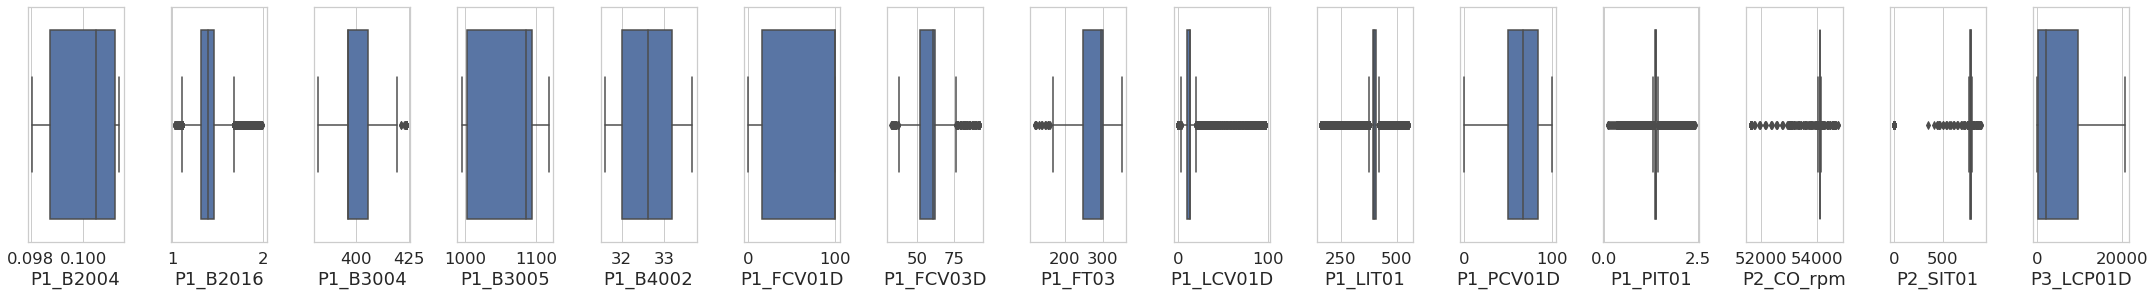

In [15]:
number_of_columns = len(hai_data.columns) 
plt.figure(figsize=(2*number_of_columns,8))
for cc in range(0,number_of_columns - 1):
    plt.subplot(2 ,number_of_columns ,cc+1)
    sns.boxplot(hai_data[hai_data.columns[cc]], orient='v')
    plt.tight_layout()

Visualize frequency precentage of the class 

Text(0, 0.5, 'ICS dataset - Frequency Percentage')

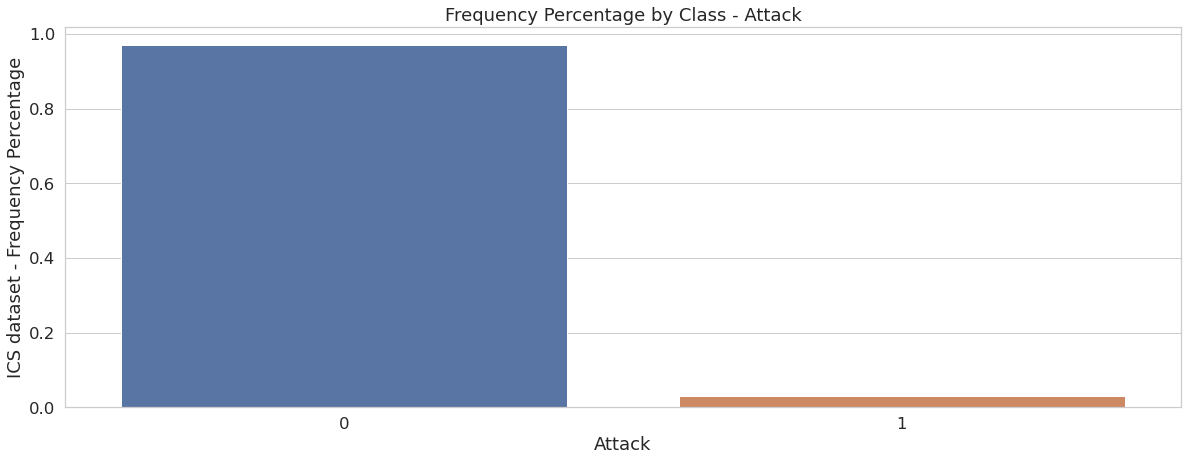

In [16]:
count_classes = pd.value_counts(hai_data['attack'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(hai_data))[0],tuple(count_classes/len(hai_data))[1]])
ax.set_title('Frequency Percentage by Class - Attack')
ax.set_xlabel('Attack')
ax.set_ylabel('ICS dataset - Frequency Percentage')

Visualizing each feature

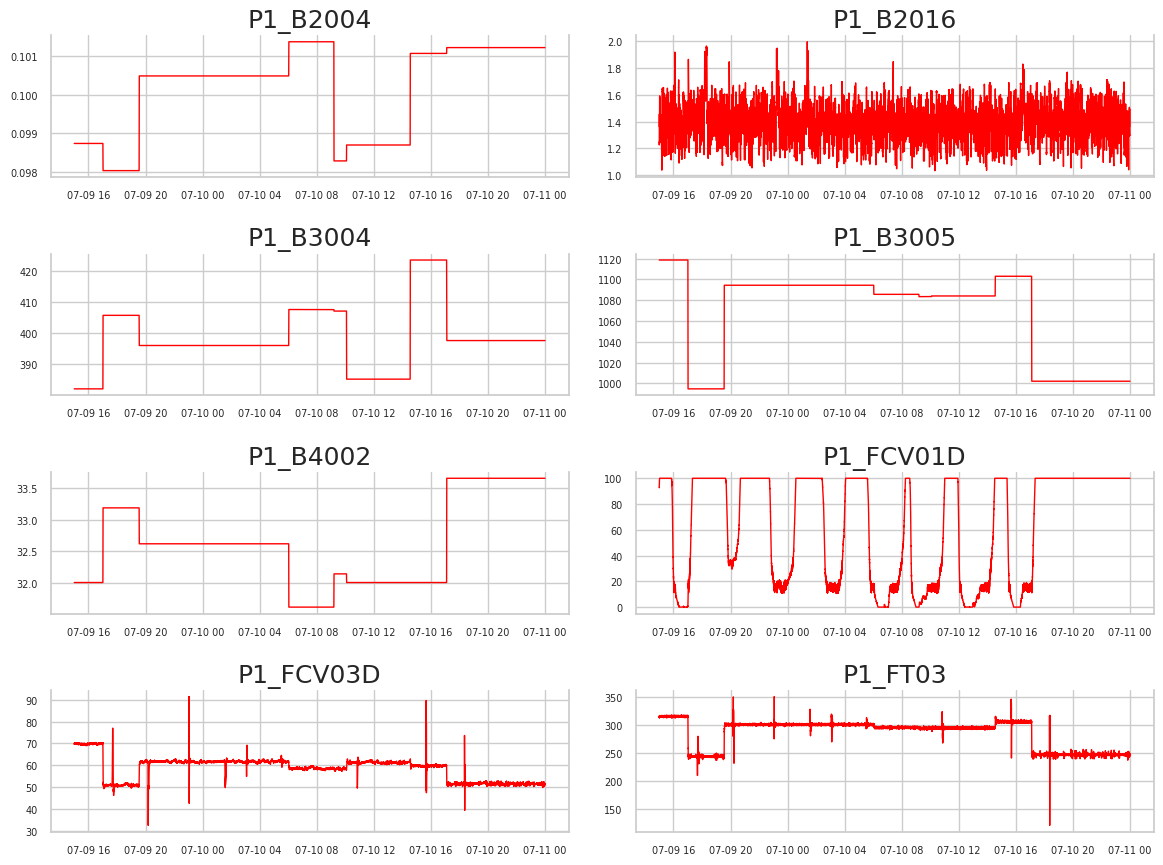

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=80, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(hai_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout();

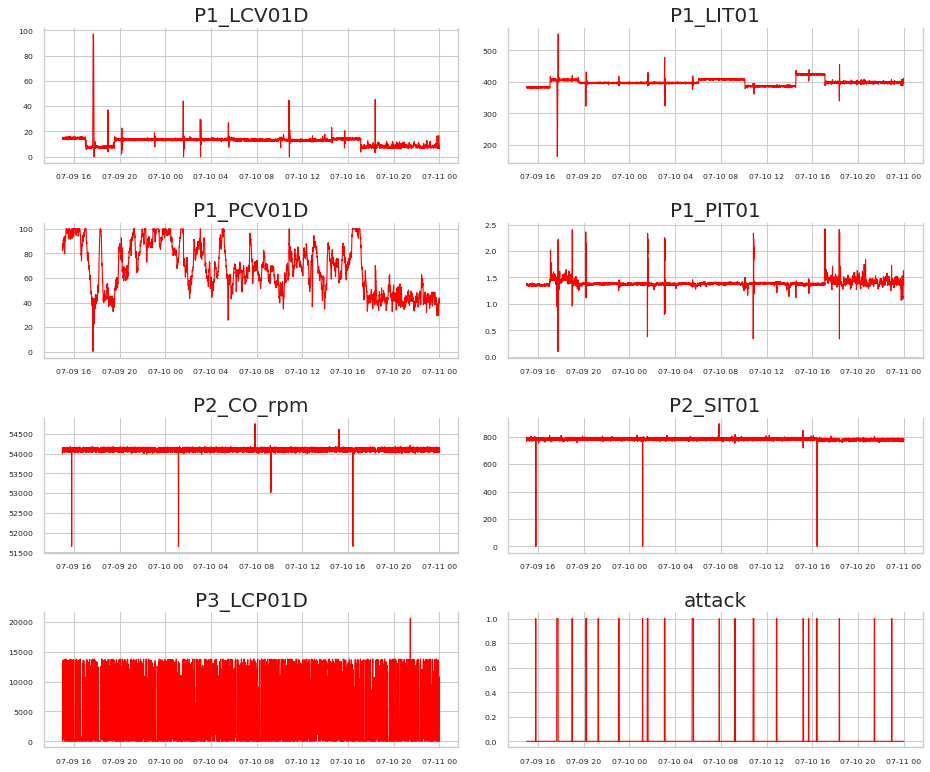

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=80, figsize=(12,10))

for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i+8]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(hai_data.columns[i+8])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout();

### Correaltion
As part of exploratory data analysis sometimes incredibly useful to look at correlation matrix.
We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types. We will start with the correlation matrix.
In the  plot below we can find negative and postitive correlation between each feature. The darker the color the close the feature correlated to the prediction goal.For example we find a positive correlation of 0.95 between P2_SIT01 & P2_CO_RPM  or between P1_B3005 and P1_FT03 .


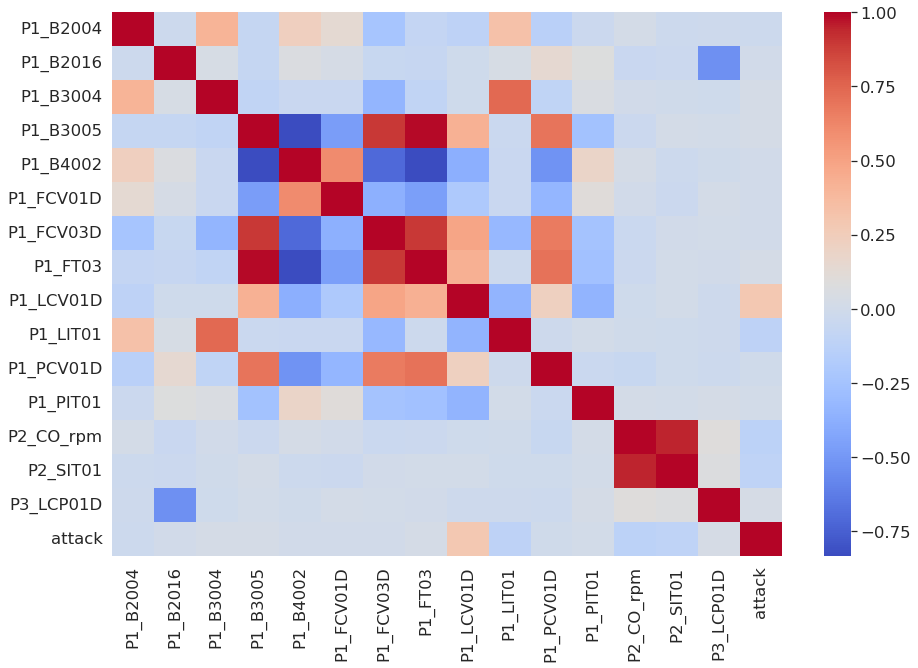

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(hai_data.corr(),annot=False,cmap='coolwarm')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

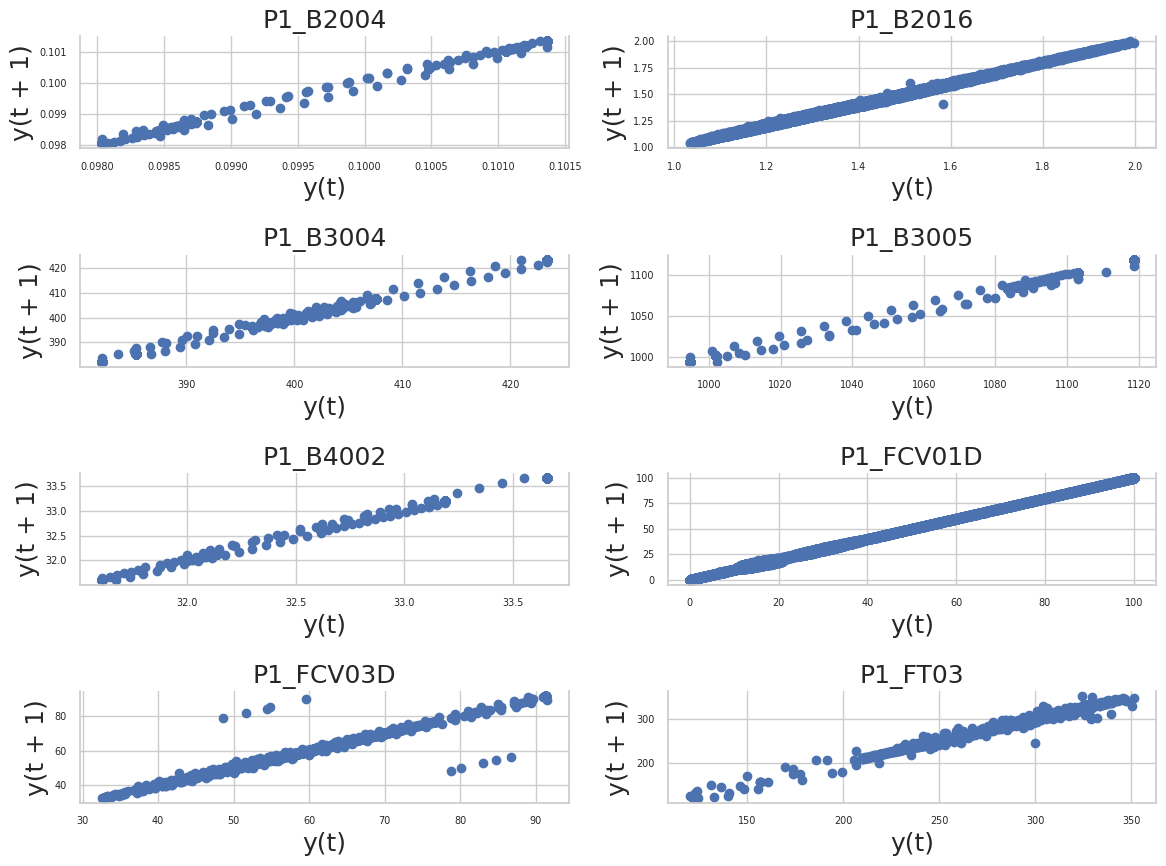

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=100, figsize=(12,9))
for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i]]
    lag_plot(data,ax=ax)
    # Decorations
    ax.set_title(hai_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout();
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

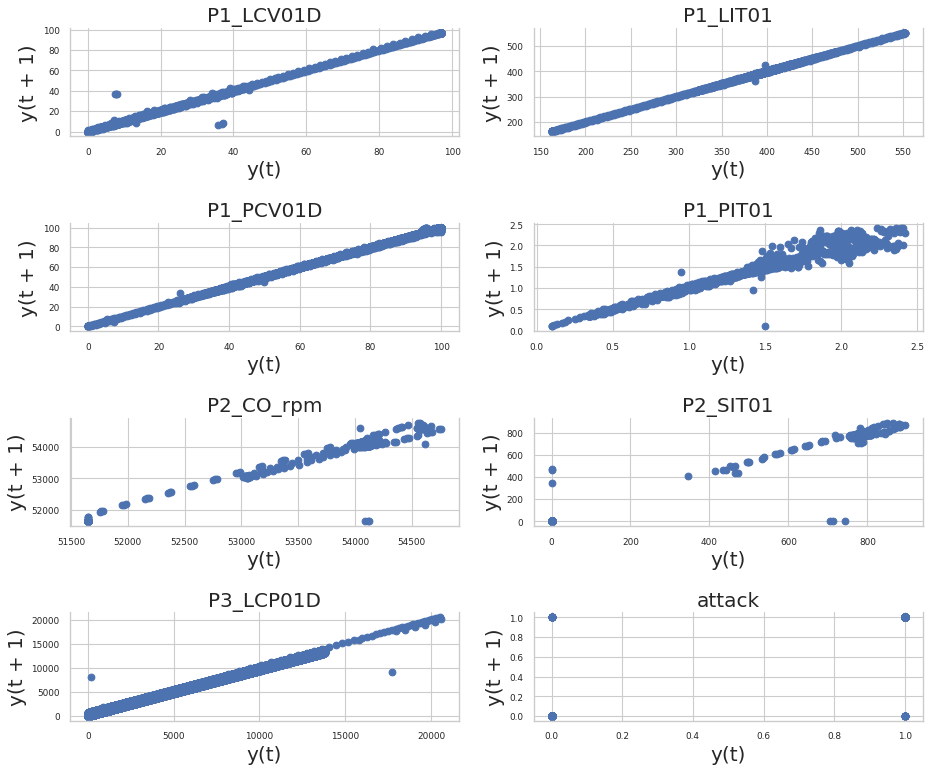

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=80, figsize=(12,10))

for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i+8]]
    lag_plot(data,ax=ax)
    # Decorations
    ax.set_title(hai_data.columns[i+8])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=8)
plt.tight_layout();

#### Autocorrelation Plots


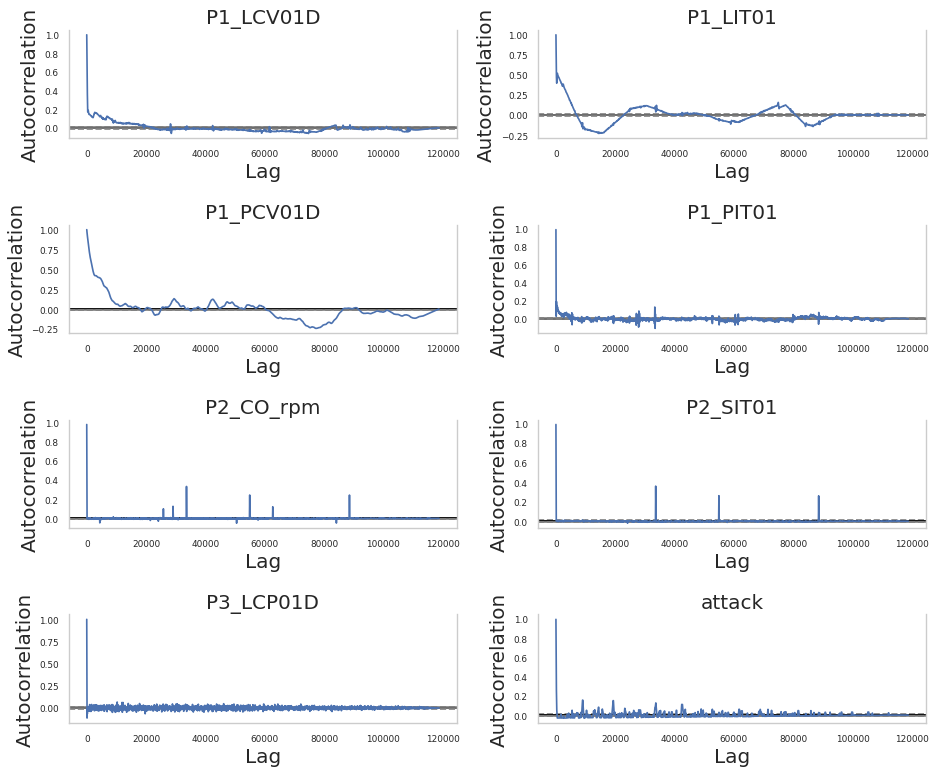

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=80, figsize=(12,10))

for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i+8]]
    autocorrelation_plot(data,ax=ax)
    # Decorations
    ax.set_title(hai_data.columns[i+8])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=8)
plt.tight_layout();

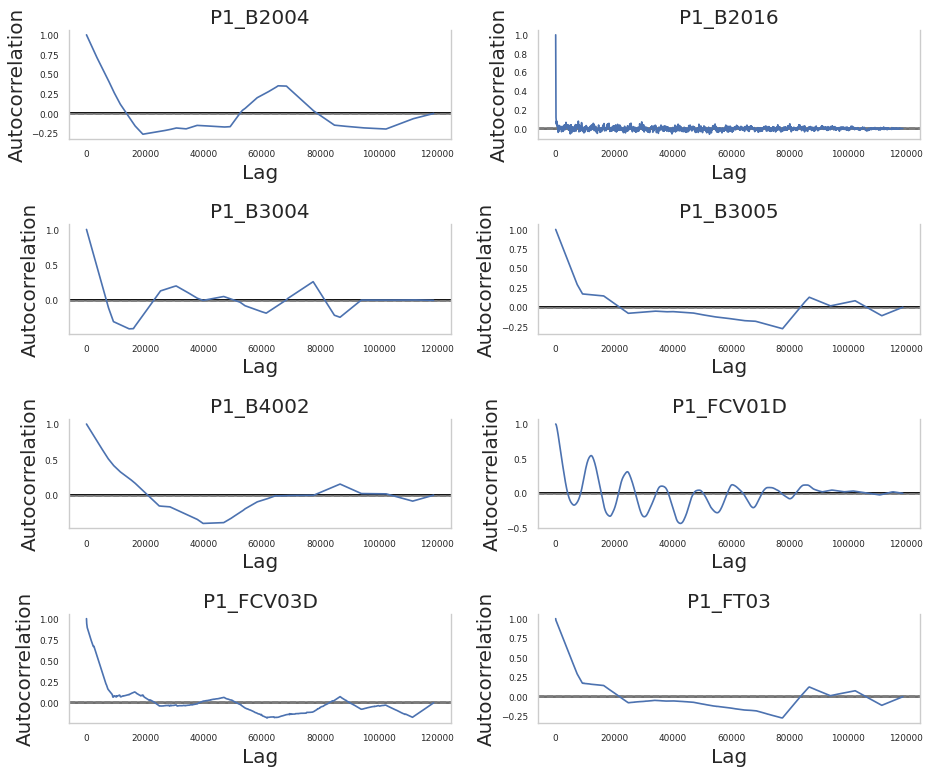

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=80, figsize=(12,10))

for i, ax in enumerate(axes.flatten()):
    data = hai_data[hai_data.columns[i]]
    autocorrelation_plot(data,ax=ax)
    # Decorations
    ax.set_title(hai_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=8)
plt.tight_layout();


### Time series components ( Trend, seasonality , Cyclic variations, irregularities)

* <b>Trend</b>: presense of long-term increase or decrease in the sequence 
* <b>Seasonality</b>: variation that occurs at specific intervals of less than a year - span (daily, weekly, monthly) 
* <b>Cyclic Variations</b> : rises and falls that are not of a fixed frequency.


#### Time Series Decomposition

We look in to different decomposition additive model to provide structured way of our prediction problem. As time series components can be directly modeled because of the inconsitency of the values.  

 Additive Model = TREND + LEVEL + SEASONALITY + NOISE 


A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

* Level: The average value in the series. rises and falls that are not of a fixed frequency - cyclic variations.
* Trend: The increasing or decreasing value in the series. presense of long-term increase or decrease in the sequence.
* Seasonality: The repeating short-term cycle in the series. variation that occurs at specific intervals of less than a year - span (daily, weekly, monthly).
* Noise: The random variation in the series.

In [24]:
hai_data_an.columns

Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_FCV01D',
       'P1_FCV03D', 'P1_FT03', 'P1_LCV01D', 'P1_LIT01', 'P1_PCV01D',
       'P1_PIT01', 'P2_CO_rpm', 'P2_SIT01', 'P3_LCP01D', 'attack'],
      dtype='object')

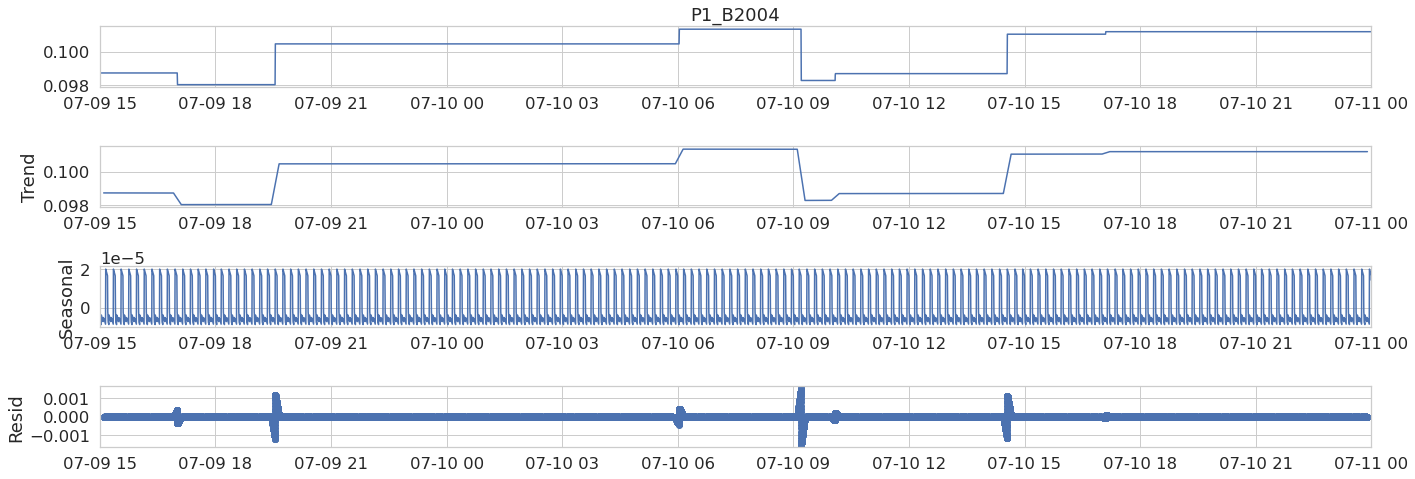

In [25]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_B2004, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

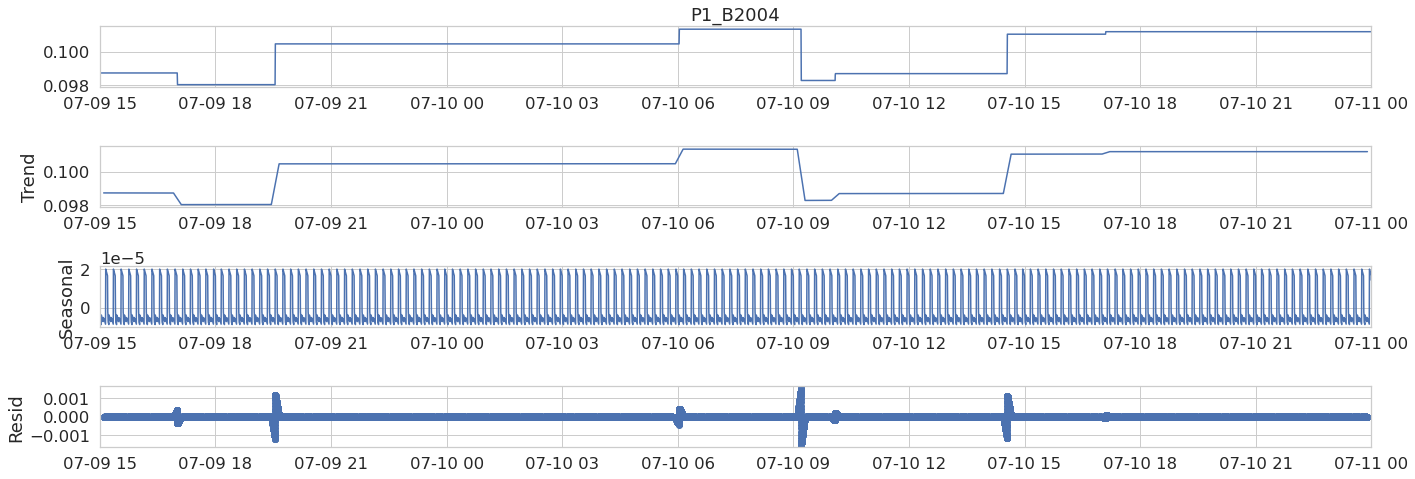

In [26]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_B2004, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

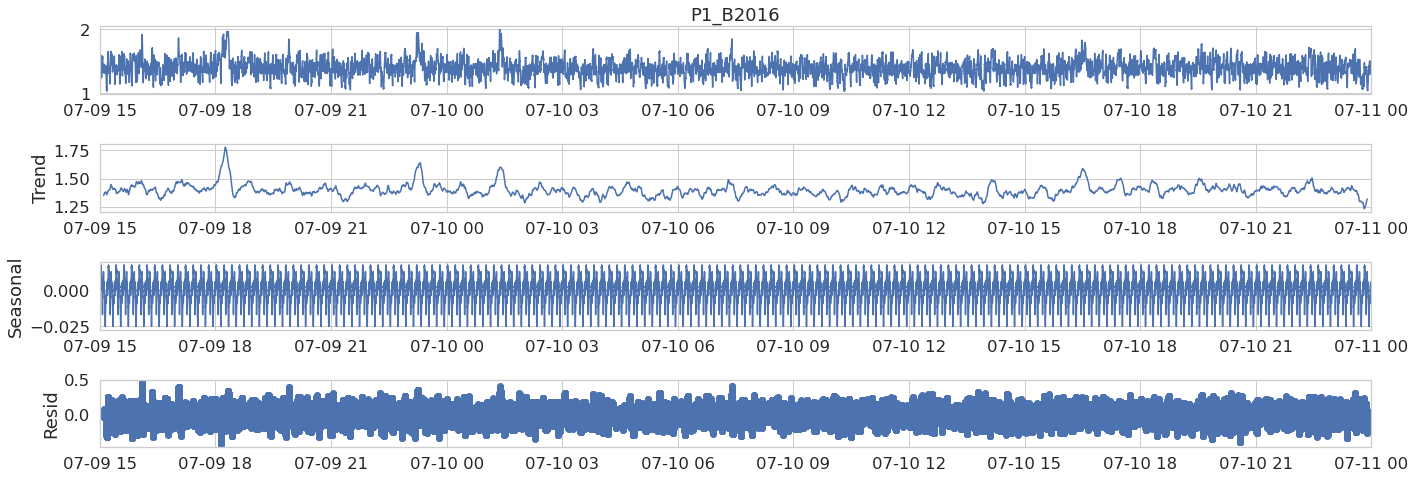

In [27]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_B2016, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

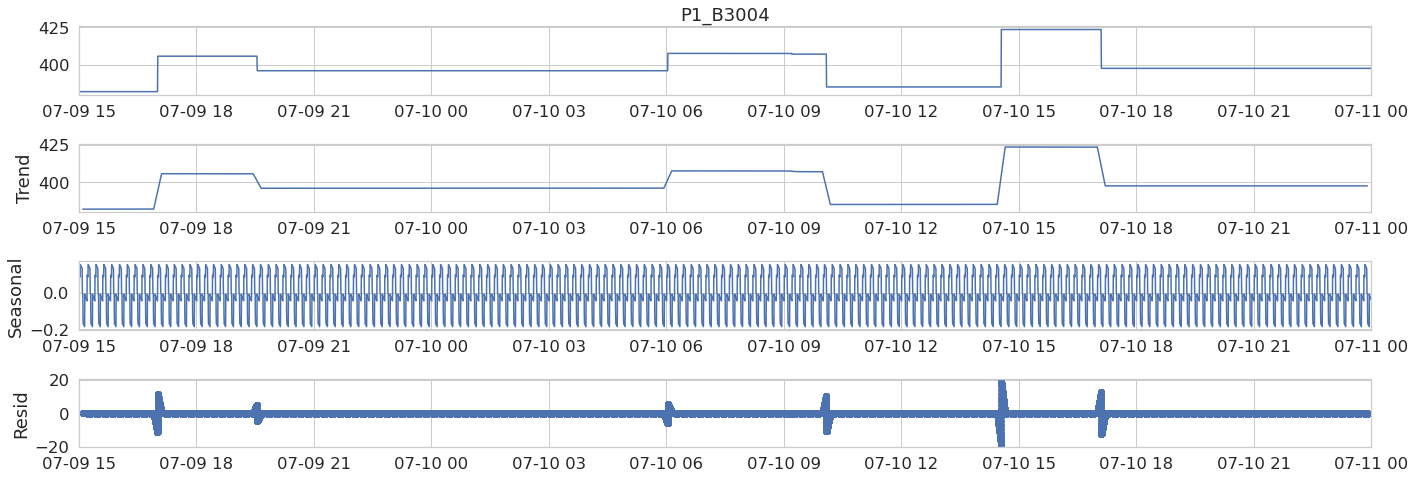

In [28]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 1 minutes
result = seasonal_decompose(hai_data_an.P1_B3004, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

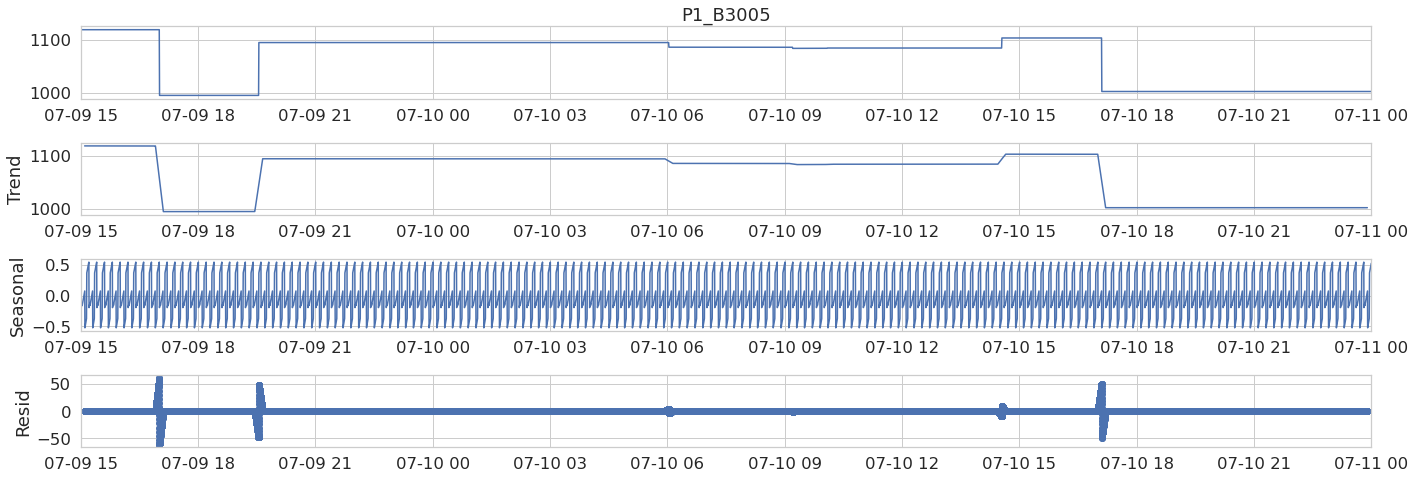

In [29]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every  2 minutes
result = seasonal_decompose(hai_data_an.P1_B3005, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

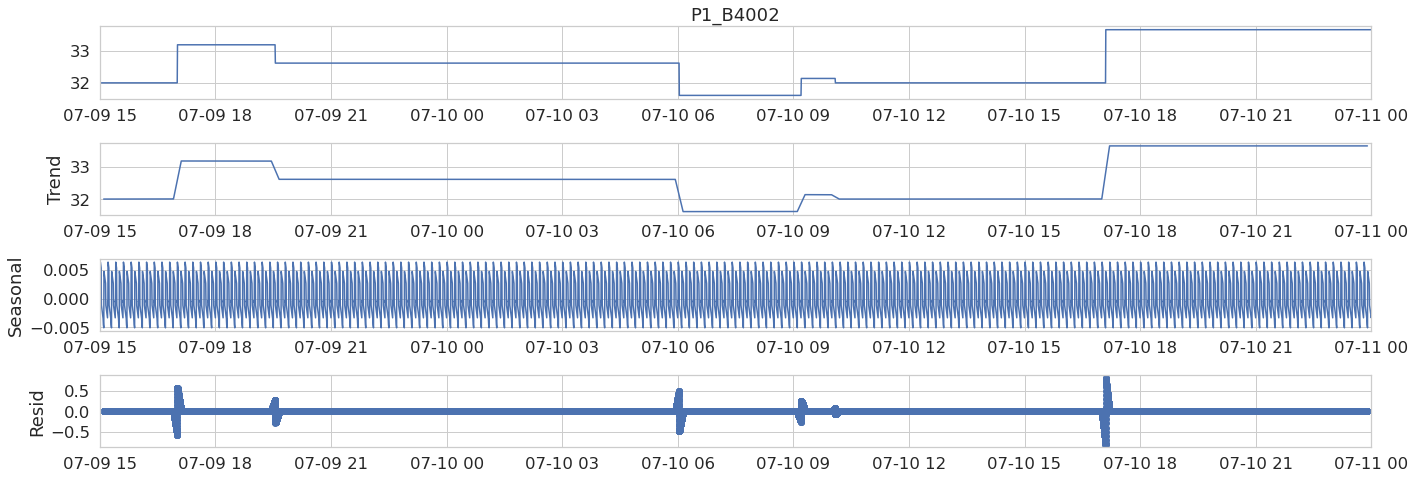

In [30]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 2 minutes
result = seasonal_decompose(hai_data_an.P1_B4002, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

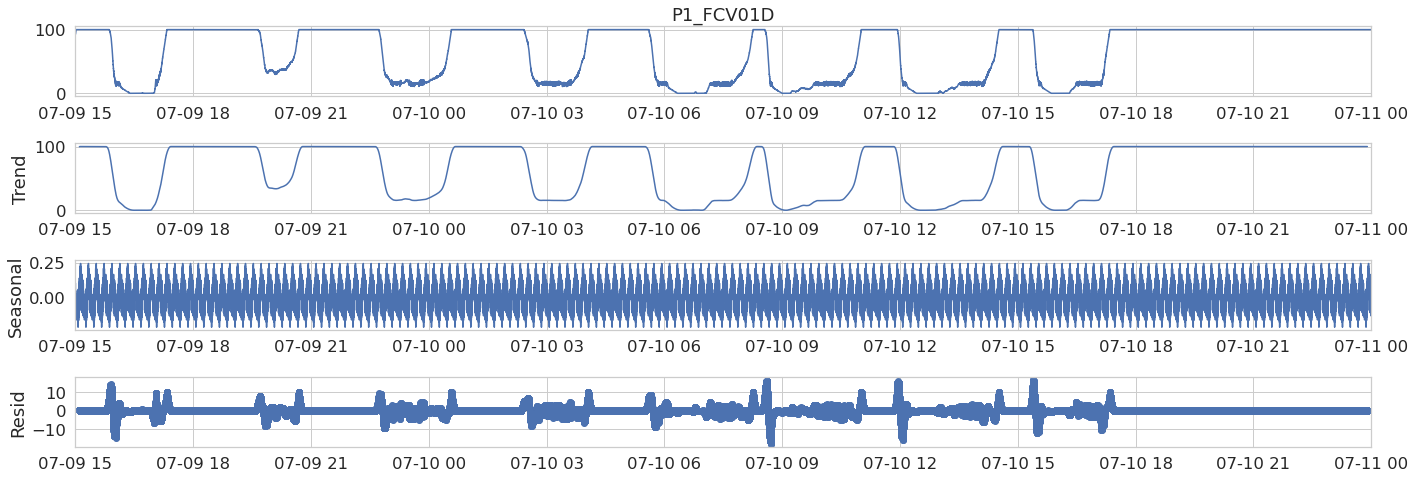

In [31]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 2 minutes
result = seasonal_decompose(hai_data_an.P1_FCV01D, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

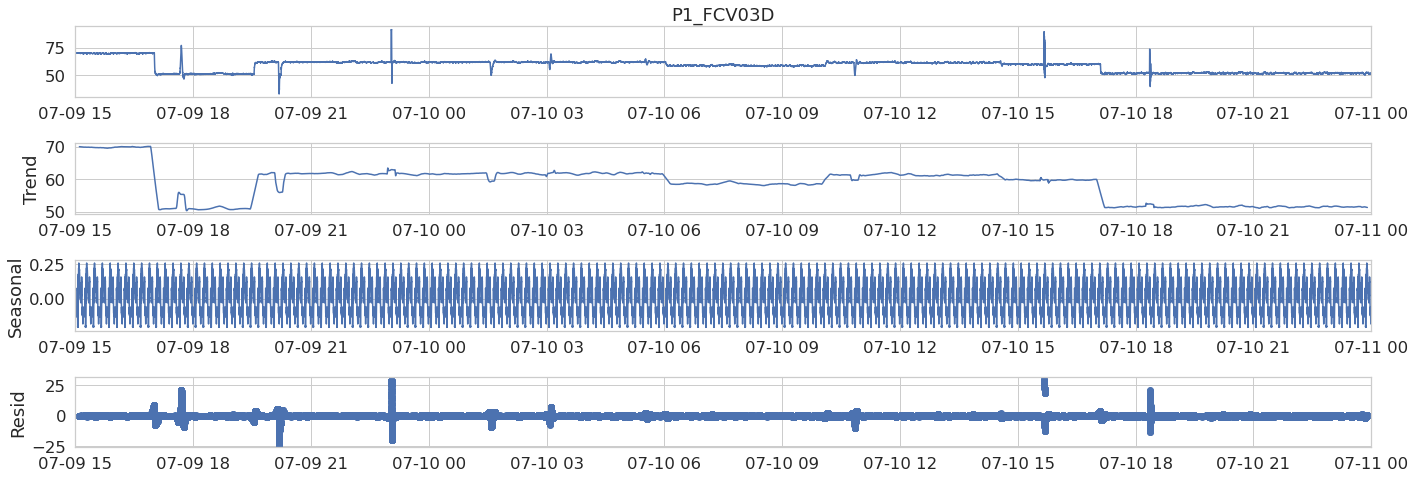

In [32]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_FCV03D, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

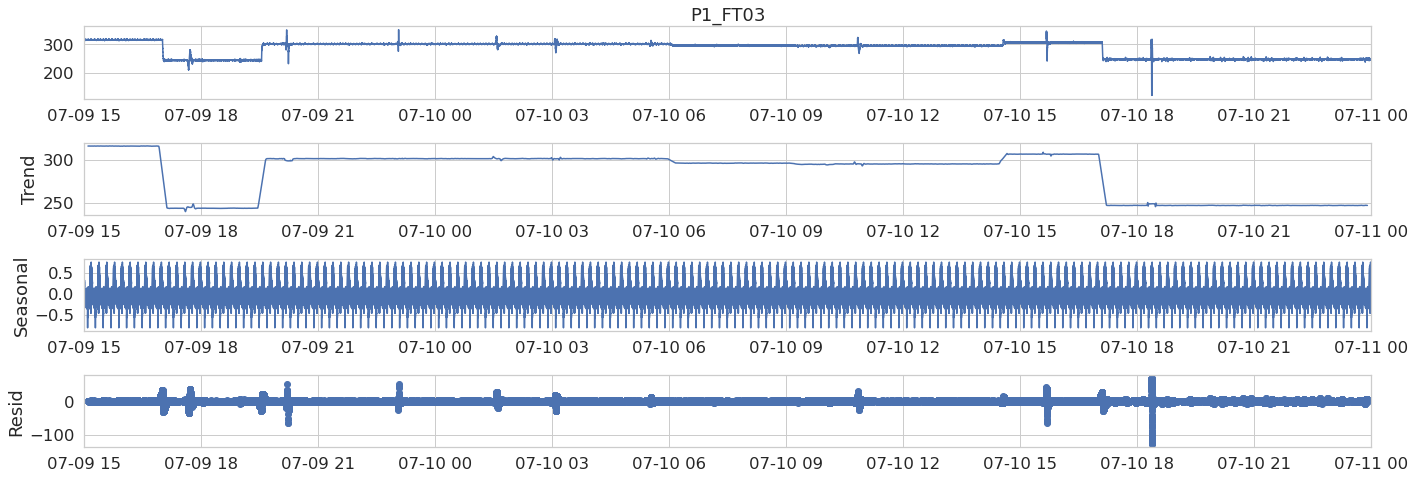

In [33]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_FT03, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

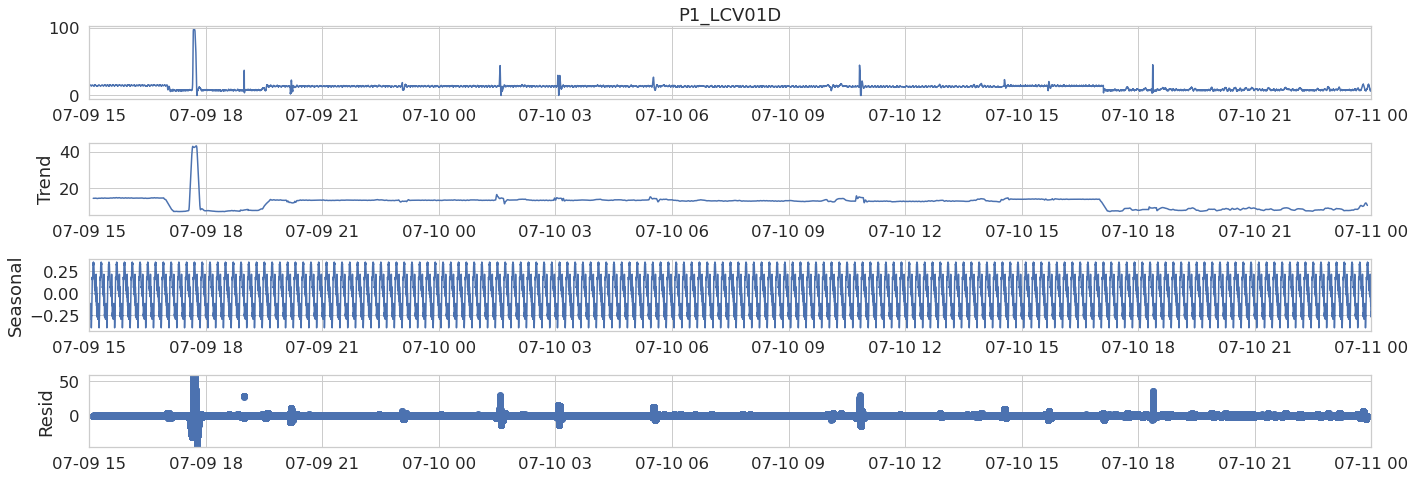

In [34]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_LCV01D, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

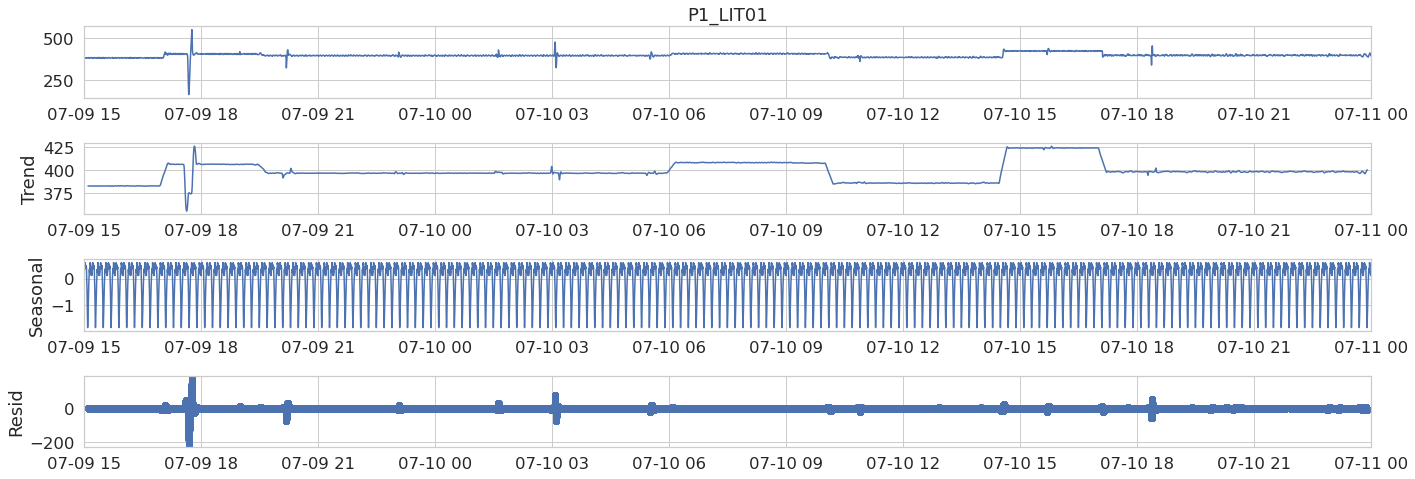

In [35]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_LIT01, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

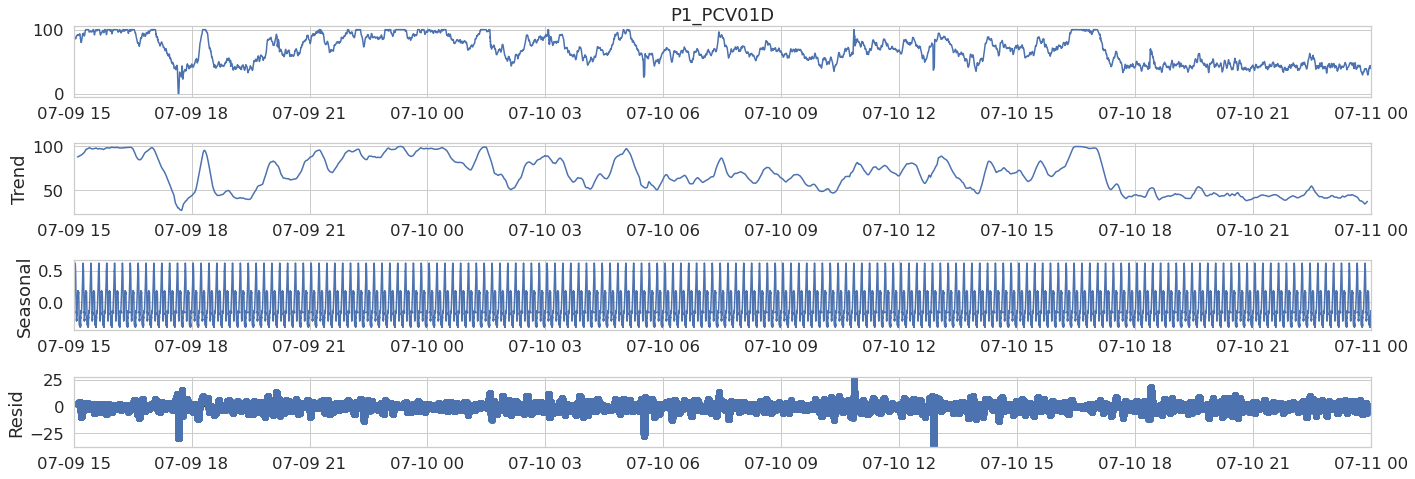

In [36]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P1_PCV01D, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

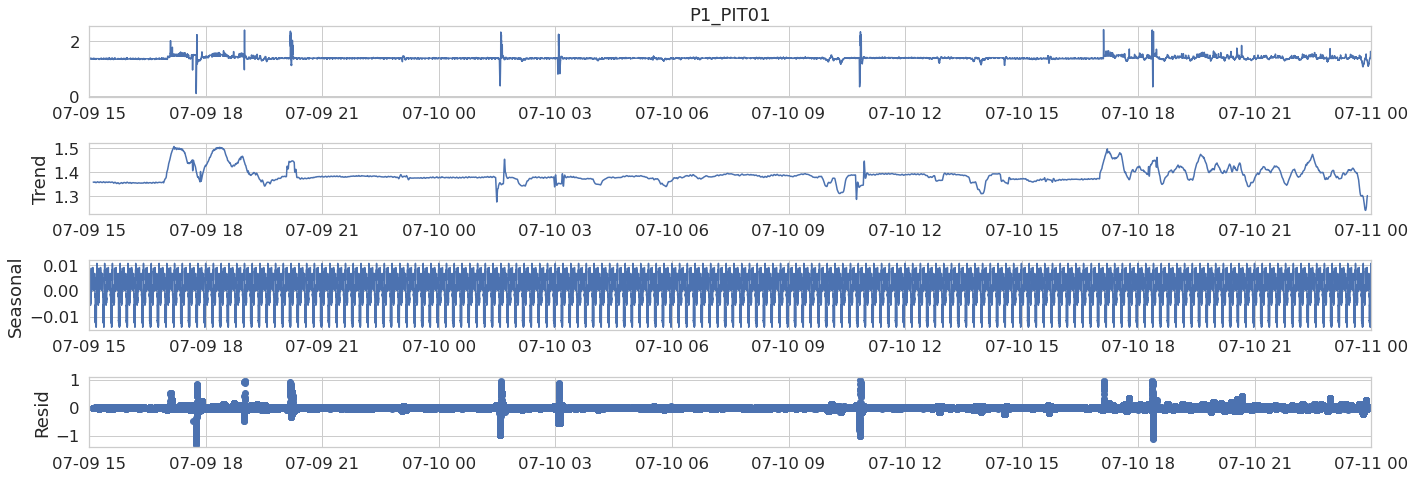

In [37]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 2 minutes
result = seasonal_decompose(hai_data_an.P1_PIT01, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

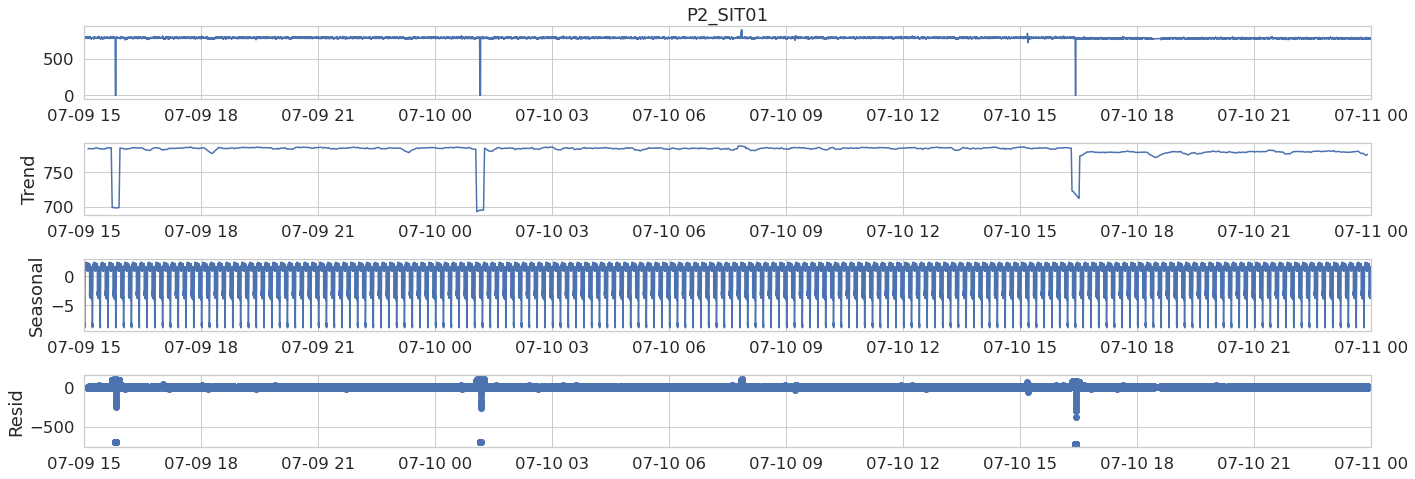

In [38]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P2_SIT01, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

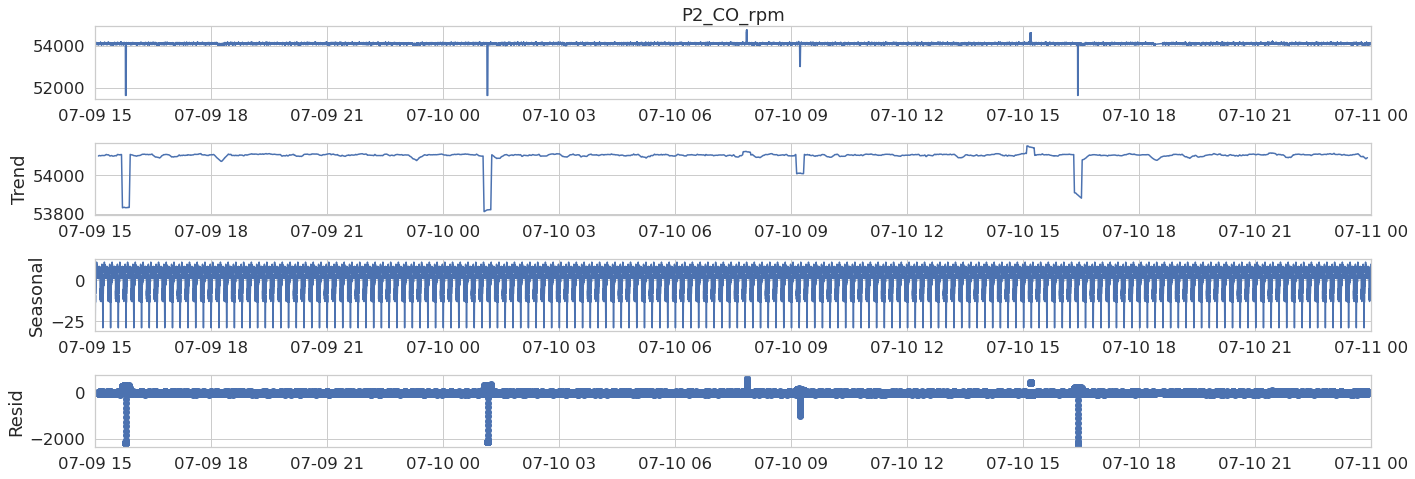

In [39]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 2 minutes
result = seasonal_decompose(hai_data_an.P2_CO_rpm, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

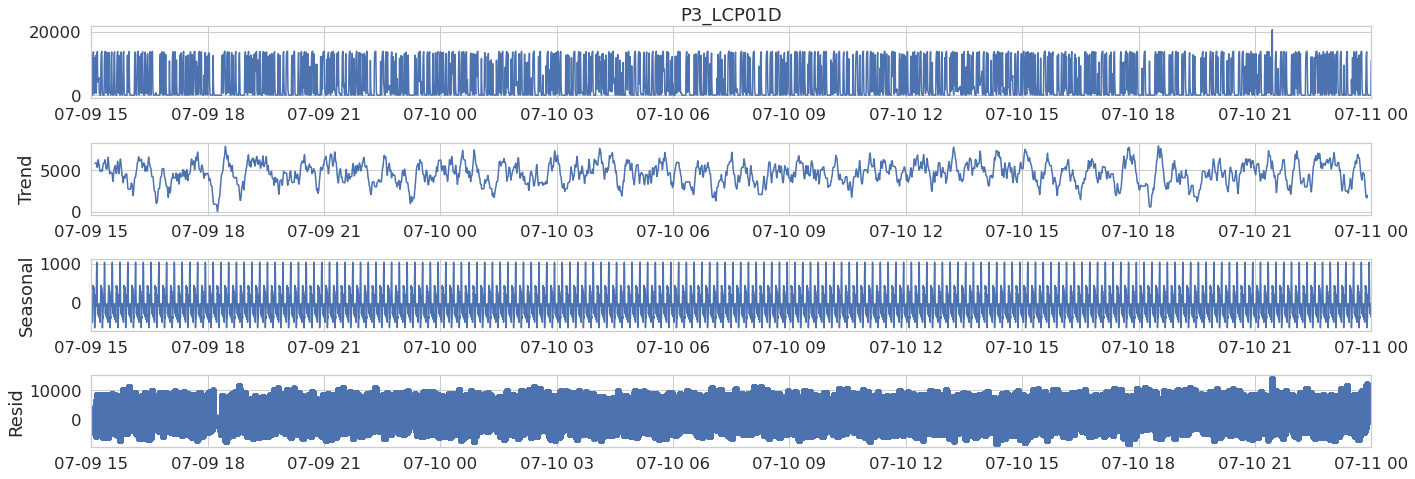

In [40]:
# freq need to be the # of samples in a season So if I had daily seasonality and my samples are every 5 minutes
result = seasonal_decompose(hai_data_an.P3_LCP01D, model='additive', freq = ((24*60)//2))
result.plot()
plt.show()

#### Abnormalities 

We did some additional graphical EDA on top of some quantitative EDA to check for trends and unusual behaviour. The sensor data plotted over time with the attack status of <b>"1" </b> put up in red on the same graph is really interesting.

That way, we can see exactly when the attack occured or any abnormalities and how the sensor values reflect it. The following code generates the aforementioned graph for each of the sensors/ setpoints reading :

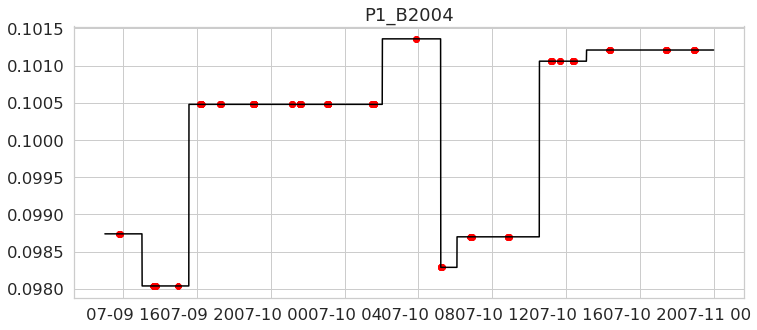

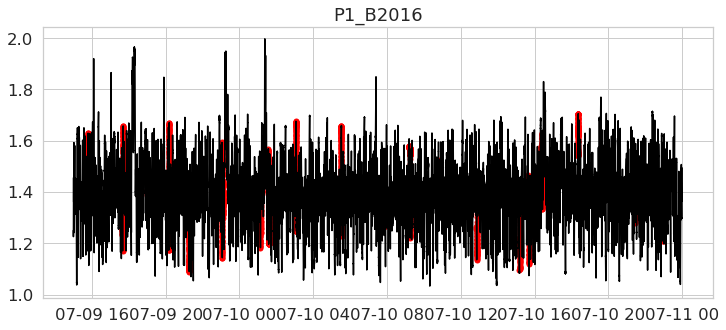

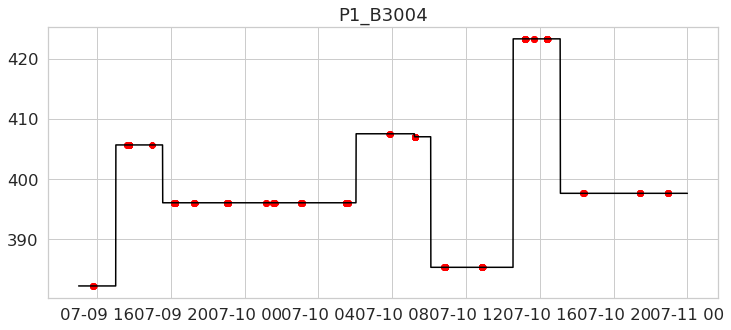

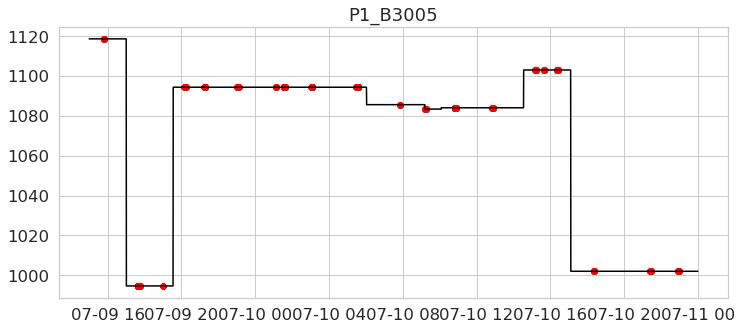

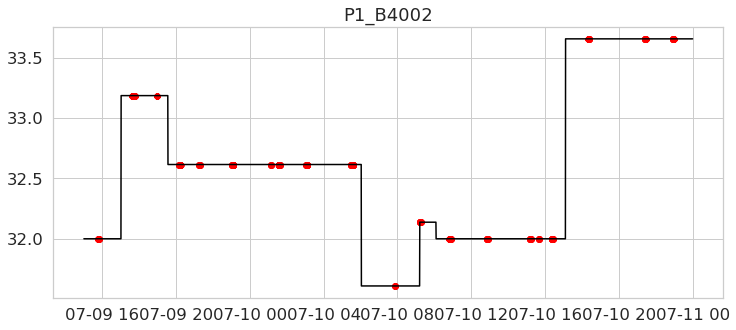

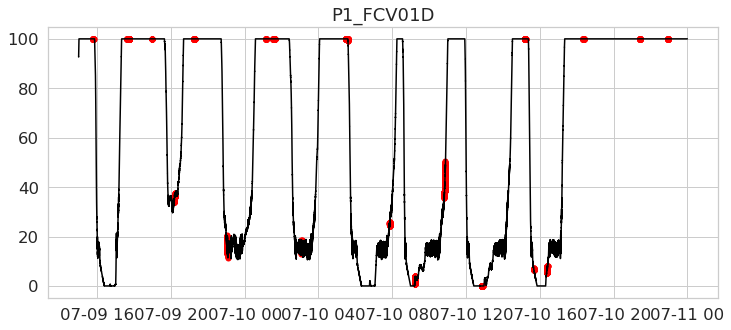

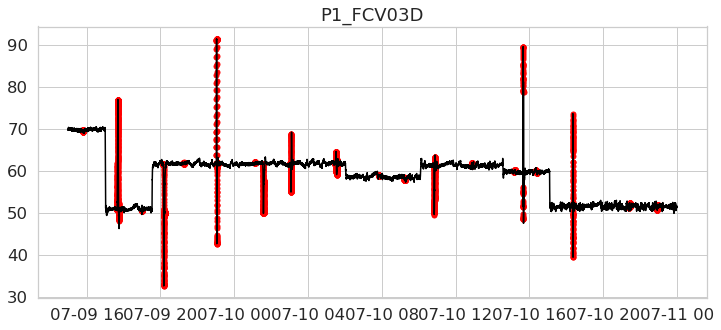

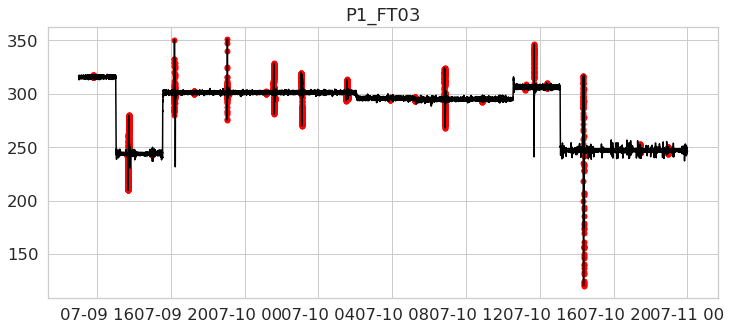

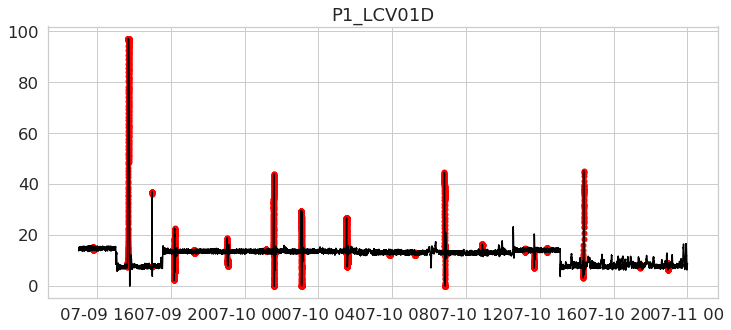

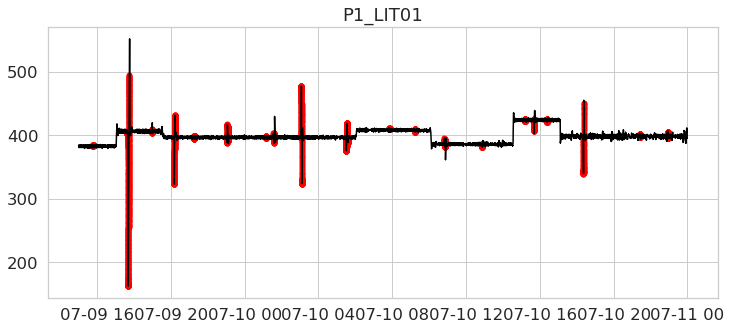

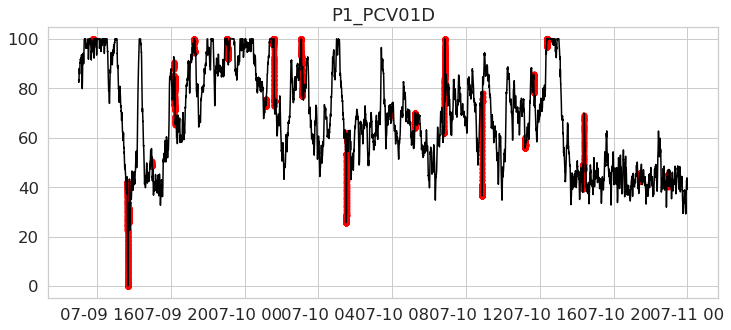

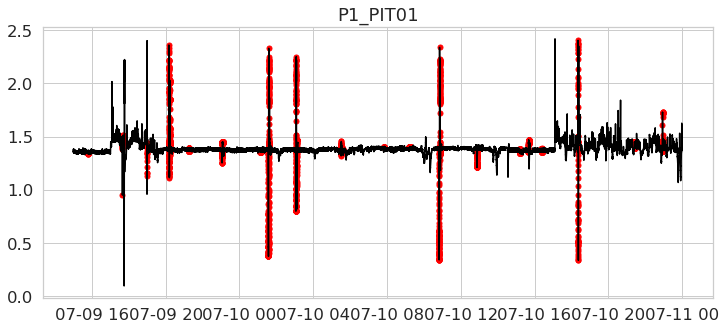

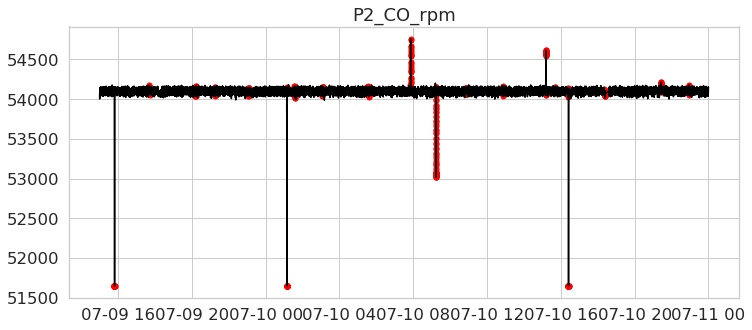

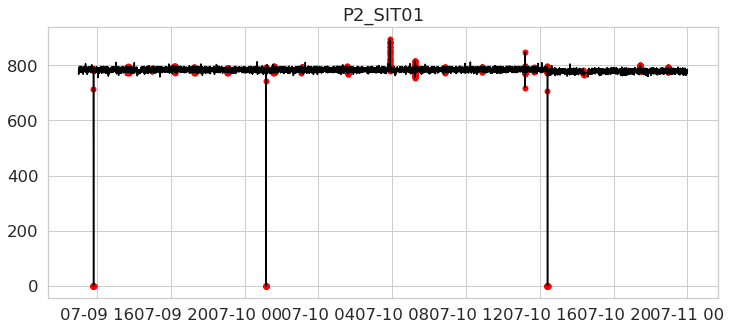

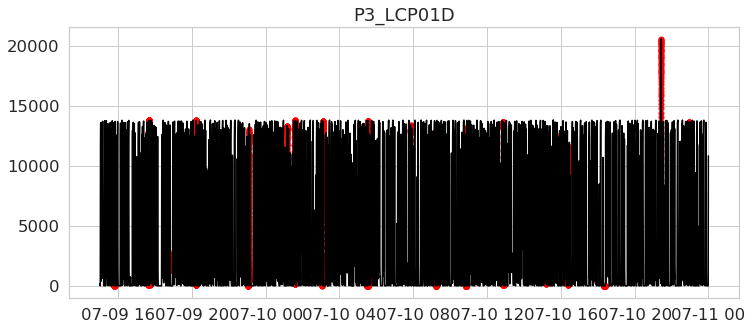

In [41]:
attck_state = hai_data[hai_data['attack'] == 1]
pred = hai_data.drop(['attack'], axis=1)
names=pred.columns
for name in names:
    _ = plt.figure(figsize=(12,5))
    _ = plt.plot(attck_state[name], linestyle='none', marker='o', color='red', markersize=5)
    _ = plt.plot(hai_data[name], color='black')
    _ = plt.title(name)
    #_ = plt.savefig('Trends'+str(name)+'.png')
    #plt.clf()
    plt.show()

#### Resample The Data (5T - 5 Minutes)
To simplify our plots which has a lot of data points due to the hourly and minute records, we can aggregate the data for each day using the .resample() method.

As seen from the plots  we conclude the followings:
* Prominent seasonality can be observed in series
* Noticeable trends and changing levels can be seen in series P1_B2004 ,P1_B3004 , P1FCV03D also shows increasing variance.

Some of the data here are stationary and others not so we will need to apply a transformation method on the data to make the data stationary before training the data.

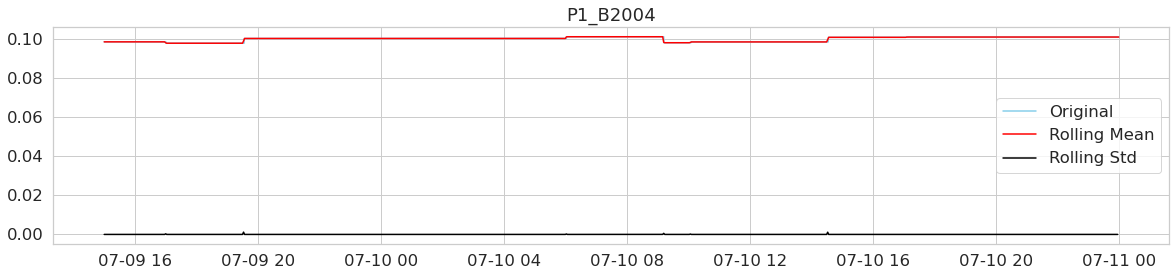

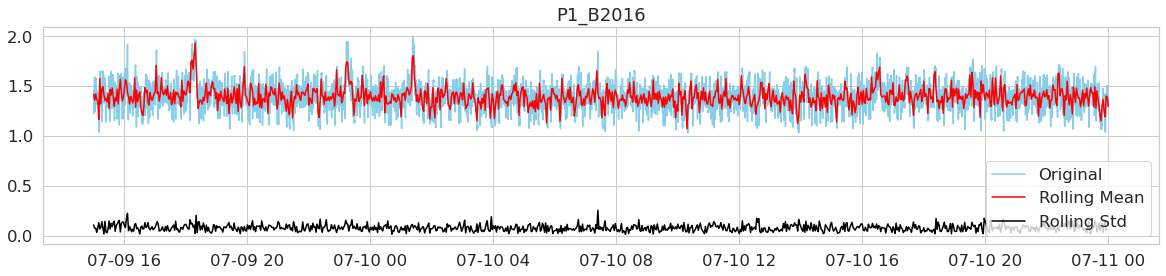

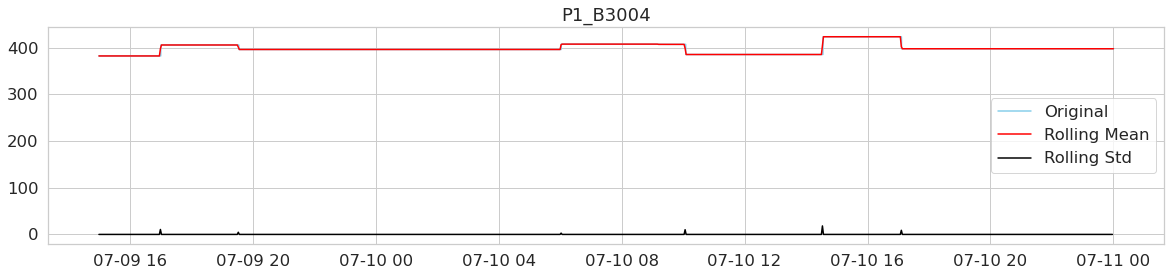

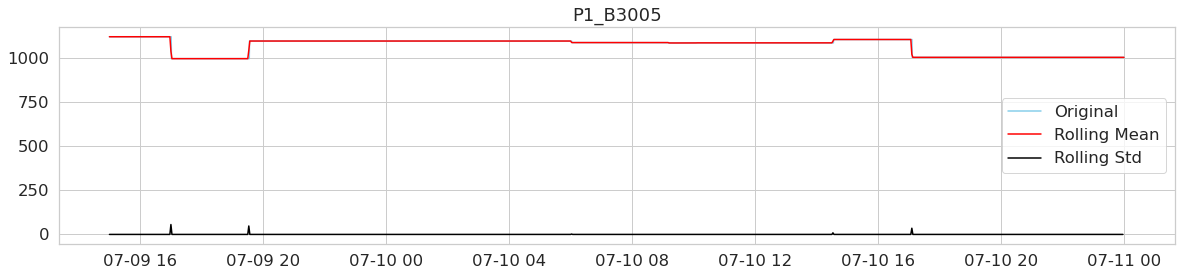

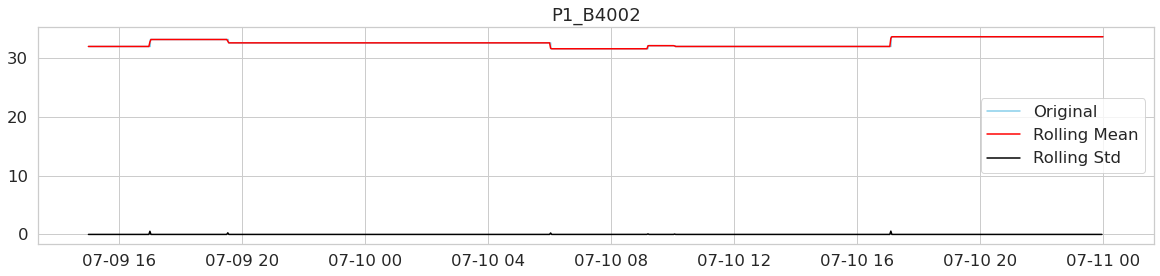

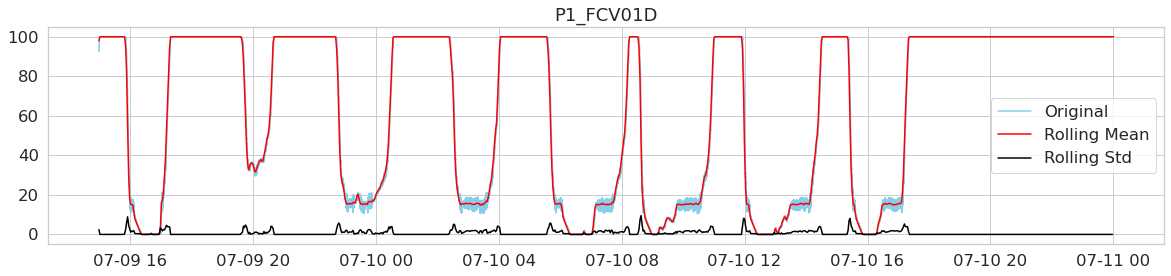

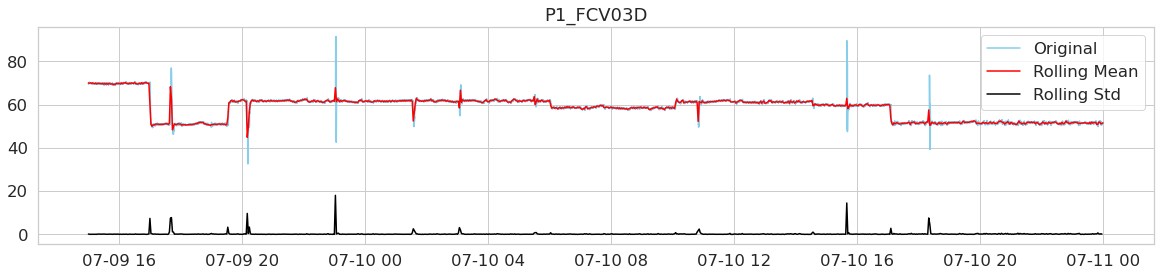

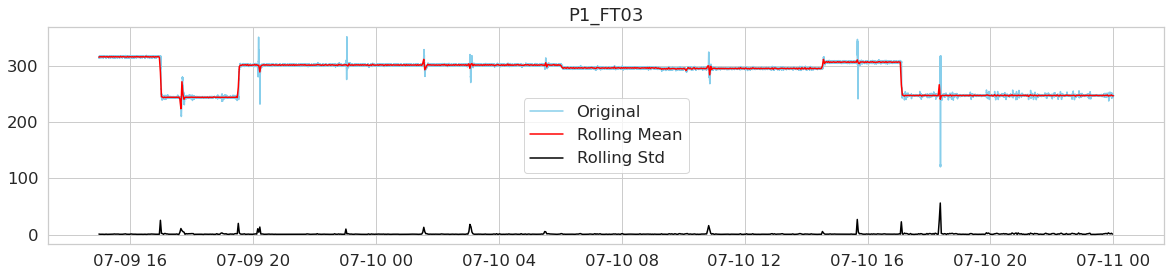

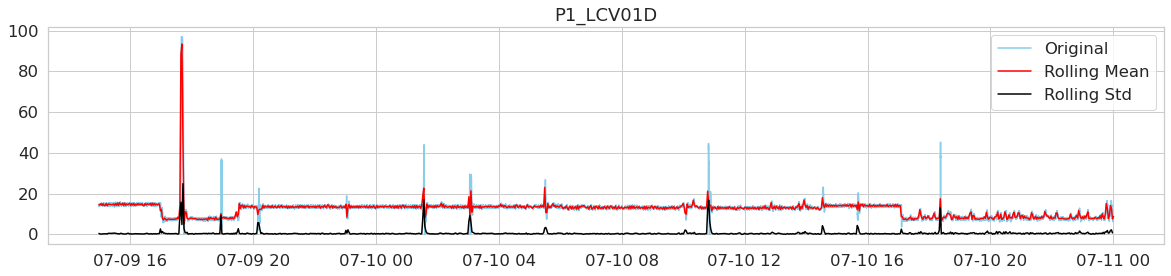

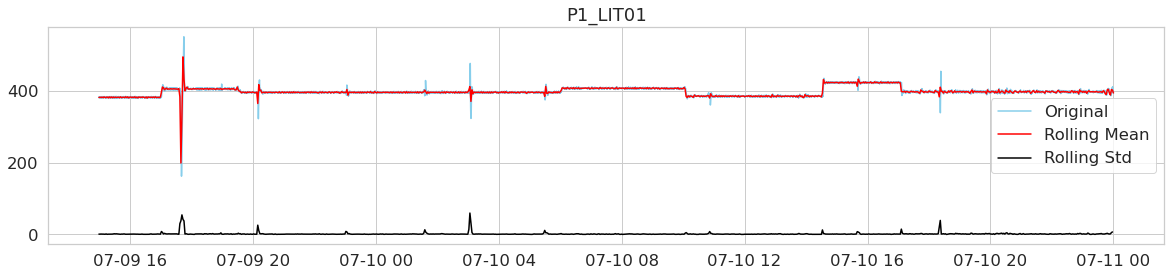

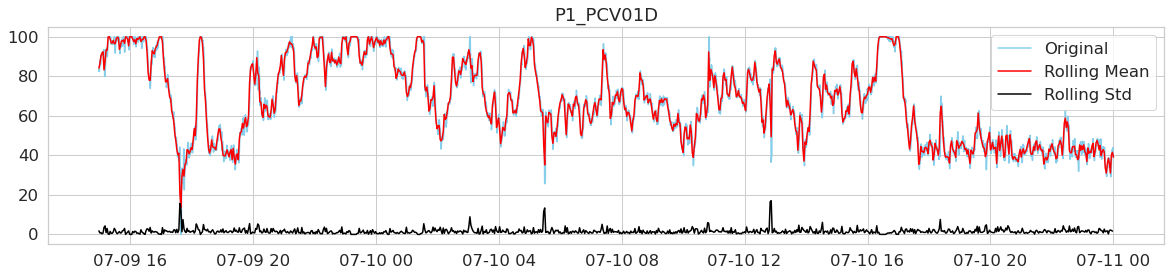

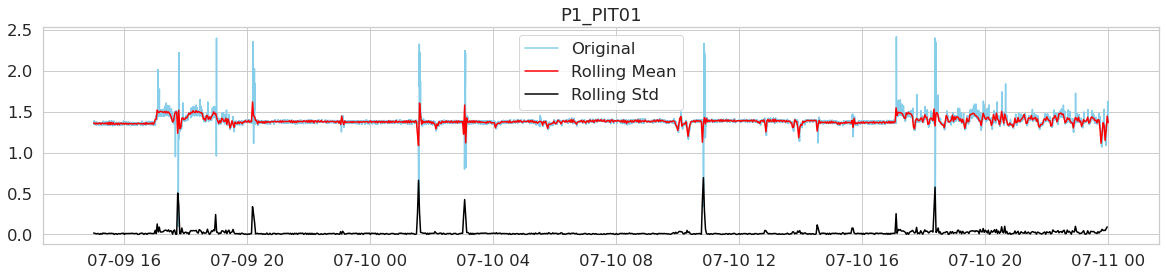

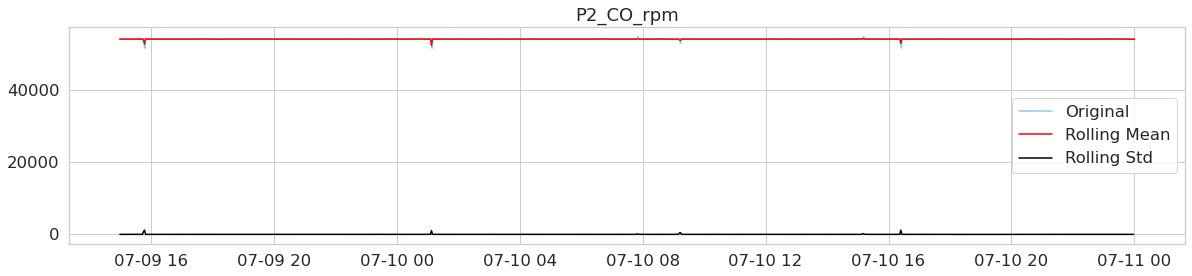

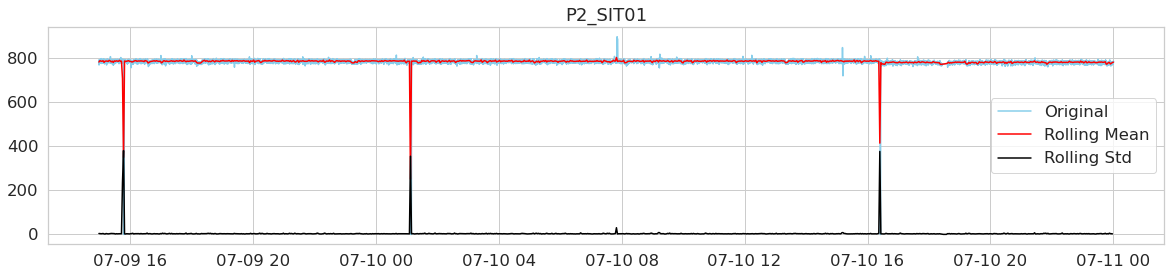

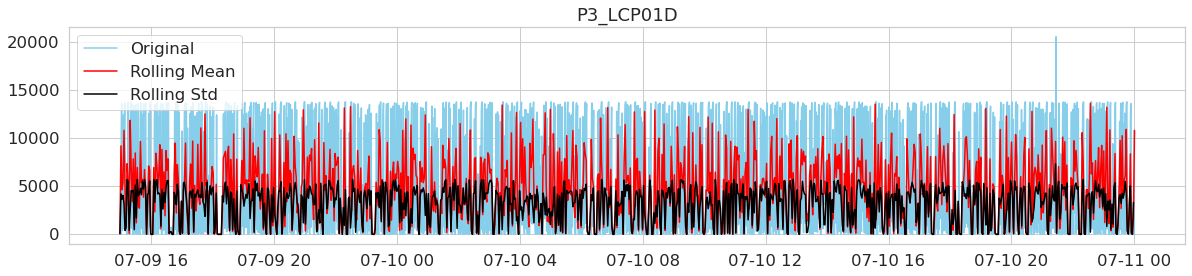

In [42]:
# Resample the entire dataset by 5 minutes average
rollmean = hai_data.resample(rule='2T').mean()
rollstd = hai_data.resample(rule='2T').std()
# Plot time series for each sensor with its mean and standard deviation
for name in names:
    _ = plt.figure(figsize=(20,4))
    _ = plt.plot(hai_data[name], color='skyblue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

## <span style="color:blue"><b>Time Series Data Tests & Conversion</b></span>
Once we accomplished an exploratory data analysis and detected data imperfection time to shape the dataset for the next steps.

###  Stationarity Check (ADF test)

It is critical in time series analysis that the data be steady and free of autocorrelation. The term "stationarity" refers to the behavior of data whose mean and standard deviation change over time; data with this behavior is not considered stationary. 
<br>
Autocorrelation, on the other hand, is the behavior of data when it is correlated with itself at a different time period. 
<br>
Next, I'll  do the followings :
1. Visually evaluate the stationarity of each feature in the data set, which is exactly what the following code will accomplish. 
2. Use Dickey Fuller test to quantitatively confirm the observed stationarity later.
<br>
3. We'll also look at the autocorrelation of the characteristics before feeding them into the clustering algorithms to see if there are any irregularities.

In [43]:
def stationarity_check(data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(data, autolag='AIC')
    else:
        adf_test = adfuller(data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results = {col: stationarity_check(hai_data, col)for col in hai_data.columns}
adf_test_results

{'P1_B2004': 'Non-Stationary',
 'P1_B2016': 'Stationary',
 'P1_B3004': 'Stationary',
 'P1_B3005': 'Non-Stationary',
 'P1_B4002': 'Non-Stationary',
 'P1_FCV01D': 'Stationary',
 'P1_FCV03D': 'Stationary',
 'P1_FT03': 'Stationary',
 'P1_LCV01D': 'Stationary',
 'P1_LIT01': 'Stationary',
 'P1_PCV01D': 'Stationary',
 'P1_PIT01': 'Stationary',
 'P2_CO_rpm': 'Stationary',
 'P2_SIT01': 'Stationary',
 'P3_LCP01D': 'Stationary',
 'attack': 'Stationary'}

We can see from the results above P1_B2004 , P1_B3005, and P1_B4002 are non-stationary.

### Make The Data Stationary (Data Transformation)

The Augmented Dickey-Fuller Technique is a popular statistical test for determining whether or not a time series is stationary. This can be accomplished by specifying the null and alternate hypotheses.
* Null Hypothesis: Time Series is stationary. It gives a time-dependent trend.
* Alternate Hypothesis: Time Series is non-stationary. In another term, the series doesn’t depend on time.
* ADF or t Statistic < critical values: Accept the null hypothesis. Time series is stationary.
* ADF or t Statistic > critical values: Failed to reject the null hypothesis. The time series is non-stationary

We have run the ADF test for every column in the data.
We convert the data to stationary if it is not stationary using differencing

In [44]:
# Differencing  Function
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data


In [45]:
# Iterate through the columns
hai_data_diff = pd.DataFrame()
for col in hai_data.columns:
    hai_data_diff[col] = differencing(hai_data, col, 1)

# Running the stationary check again
adf_test_results = {col: stationarity_check(hai_data_diff, col)for col in hai_data_diff.columns}

# Stationary results
adf_test_results

{'P1_B2004': 'Stationary',
 'P1_B2016': 'Stationary',
 'P1_B3004': 'Stationary',
 'P1_B3005': 'Stationary',
 'P1_B4002': 'Stationary',
 'P1_FCV01D': 'Stationary',
 'P1_FCV03D': 'Stationary',
 'P1_FT03': 'Stationary',
 'P1_LCV01D': 'Stationary',
 'P1_LIT01': 'Stationary',
 'P1_PCV01D': 'Stationary',
 'P1_PIT01': 'Stationary',
 'P2_CO_rpm': 'Stationary',
 'P2_SIT01': 'Stationary',
 'P3_LCP01D': 'Stationary',
 'attack': 'Stationary'}

We were able to use Augmented Dickey-Fuller Test (ADF Test) to check the stationary of each variable in the dataset. Stationarity was not achieved in some of the features, so we made the data stationary, such as eliminating the trend and seasonality by using differencing method.

All of the data columns have now become stationary. If the differencing process does not succeed in converting the data to stationary, consider utilizing log transformation and seasonal decomposition instead. We may now use a time-series model to model the data's connection. We'll utilize the VAR (Vector Auto-Regression) model in this case.

Transformed data are stationary, hence there is no need to go for second-order differencing. 




### Granger's Causality Check 

Granger causality test is carried out only on stationary data hence the differencing operation above is transformed.

To find the optimal lag by applying gangers causality in different directions and testing the max lags.

In [46]:
maxlag = 4
test = 'ssr_chi2test'
def grangers_causality_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causality_matrix(hai_data_diff, variables = hai_data_diff.columns) 


P1_B2004_x  P1_B2016_x  P1_B3004_x  P1_B3005_x  P1_B4002_x  \
P1_B2004_y       1.0000      0.0008      0.0000      0.0000      0.0000   
P1_B2016_y       0.0000      1.0000      0.0000      0.0185      0.0000   
P1_B3004_y       0.0000      0.7699      1.0000      0.0000      0.0000   
P1_B3005_y       0.0000      0.7531      0.0000      1.0000      0.0000   
P1_B4002_y       0.0000      0.0000      0.0258      0.0000      1.0000   
P1_FCV01D_y      0.6032      0.0230      0.1073      0.0243      0.0012   
P1_FCV03D_y      0.0007      0.3797      0.4179      0.0000      0.0000   
P1_FT03_y        0.0000      0.0255      0.1215      0.0000      0.0000   
P1_LCV01D_y      0.0000      0.0000      0.0000      0.0000      0.0000   
P1_LIT01_y       0.4482      0.4924      0.0000      0.0000      0.0000   
P1_PCV01D_y      0.0000      0.0000      0.0000      0.0000      0.0000   
P1_PIT01_y       0.0620      0.0000      0.0000      0.0000      0.0000   
P2_CO_rpm_y      0.5394      0.0000      0.5966      0.5251      0.4681   
P2_SIT01_y       0.5019      0.0000      0.7925      0.1857      0.5361   
P3_LCP01D_y      0.6919      0.0000      0.8243      0.8502      0.8873   
attack_y         1.0000      0.4651      1.0000      1.0000      1.0000   

             P1_FCV01D_x  P1_FCV03D_x  P1_FT03_x  P1_LCV01D_x  P1_LIT01_x  \
P1_B2004_y        0.1964       0.9005     0.0002       0.3597      0.6457   
P1_B2016_y        0.0295       0.6863     0.2865       0.0147      0.0394   
P1_B3004_y        0.0365       0.8516     0.0024       0.0153      0.5001   
P1_B3005_y        0.5689       0.4984     0.0000       0.6705      0.5334   
P1_B4002_y        0.0442       0.6249     0.0098       0.4192      0.5945   
P1_FCV01D_y       1.0000       0.8124     0.1677       0.9897      0.3350   
P1_FCV03D_y       0.8098       1.0000     0.0000       0.0000      0.4290   
P1_FT03_y         0.1005       0.0000     1.0000       0.0000      0.0000   
P1_LCV01D_y       0.9227       0.0000     0.0000       1.0000      0.0000   
P1_LIT01_y        0.7549       0.3570     0.0000       0.0000      1.0000   
P1_PCV01D_y       0.7281       0.3308     0.0000       0.0000      0.0000   
P1_PIT01_y        0.2345       0.0026     0.0000       0.0000      0.0000   
P2_CO_rpm_y       0.7218       0.2174     0.4077       0.5220      0.2765   
P2_SIT01_y        0.9025       0.5320     0.7656       0.8595      0.5422   
P3_LCP01D_y       0.0775       0.8683     0.5655       0.3185      0.7014   
attack_y          0.7867       0.7403     0.0000       0.0000      0.0028   

             P1_PCV01D_x  P1_PIT01_x  P2_CO_rpm_x  P2_SIT01_x  P3_LCP01D_x  \
P1_B2004_y        0.8030      0.6371       0.1505      0.2120       0.0289   
P1_B2016_y        0.0000      0.0000       0.0000      0.0000       0.0000   
P1_B3004_y        0.3228      0.0035       0.3283      0.7891       0.6389   
P1_B3005_y        0.5588      0.0008       0.0551      0.7279       0.1762   
P1_B4002_y        0.6930      0.0055       0.7044      0.5537       0.3607   
P1_FCV01D_y       0.6553      0.3384       0.2495      0.8487       0.4177   
P1_FCV03D_y       0.6147      0.8835       0.7721      0.7868       0.2151   
P1_FT03_y         0.0000      0.0000       0.3245      0.7055       0.1241   
P1_LCV01D_y       0.0000      0.0000       0.2807      0.7809       0.0009   
P1_LIT01_y        0.0000      0.0000       0.1124      0.4795       0.1330   
P1_PCV01D_y       1.0000      0.0000       0.0000      0.1186       0.0000   
P1_PIT01_y        0.0000      1.0000       0.1277      0.5445       0.6137   
P2_CO_rpm_y       0.0012      0.1664       1.0000      0.0000       0.0000   
P2_SIT01_y        0.0786      0.3514       0.0000      1.0000       0.0000   
P3_LCP01D_y       0.0000      0.3030       0.0000      0.0000       1.0000   
attack_y          0.0000      0.0125       0.1215      0.6195       0.5213   

             attack_x  
P1_B2004_y     1.0000  
P1_B2016_y     0.5356  
P1_B3004_y     1.0000  
P1_B

To interpret the results of Granger's causality  

Applying Cointegraion test to identify scenarios where two ore more non-stationary time series are integrated together i.e. the degree of sensitivity of two variables over a period of time to find a possible correlation.  It's used also to address the drawbacks and limitations.

In [47]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(hai_data_diff)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
P1_B2004 ::  243614.07 > nan       =>   False
P1_B2016 ::  192979.5  > nan       =>   False
P1_B3004 ::  153400.48 > nan       =>   False
P1_B3005 ::  127047.65 > nan       =>   False
P1_B4002 ::  101836.63 > 311.1288  =>   True
P1_FCV01D ::  82198.09  > 263.2603  =>   True
P1_FCV03D ::  64206.97  > 219.4051  =>   True
P1_FT03 ::  48653.25  > 179.5199  =>   True
P1_LCV01D ::  33537.89  > 143.6691  =>   True
P1_LIT01 ::  27365.33  > 111.7797  =>   True
P1_PCV01D ::  22644.14  > 83.9383   =>   True
P1_PIT01 ::  18079.71  > 60.0627   =>   True
P2_CO_rpm ::  13701.52  > 40.1749   =>   True
P2_SIT01 ::  9544.62   > 24.2761   =>   True
P3_LCP01D ::  5731.35   > 12.3212   =>   True
attack ::  2819.85   > 4.1296    =>   True


Applying cointegration test 

We can see from the results above P1_B2004 , P1_B3005, and P1_B4002 are non-stationary.

In [48]:
# Creating  MinMaxScaler and Standard Scaler function

def minamxscaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    result = pd.DataFrame(scaled, columns=[data.columns], index=data.index)
    return result
def stndrdscaler(data):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    result = pd.DataFrame(scaled, columns=[data.columns], index=data.index)
    return result

## <b><span style="color:blue">Modelling </b></span>


#### Applying Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables. Creating a validation set for time series problems is tricky because we have to take into account the time component. One cannot directly use the train_test_split or k-fold validation since this will disrupt the pattern in the series. The validation set should be created considering the date and time values.


The VAR model will capture the linear relations between multiple variables in the dataset. So , for each input series , a regression is carried out . The original variables are regressed against their own lagged values of other variables.
In other words VAR model will be used to approximate the system and monitor the residuals as a serially independent series.

Let's determine the appropriate maximum lag length for the variables in the VAR.

#### Splitting  the data (Train-Test Split)
split data into train and test. We will need this later for VAR analysis

####  Applying Isolation Forest
Isolation Forest model is an anomaly detection algorithm and rather than modeling the normal points, it discovers anomalies using isolation (how remote a data point is from the rest of the data).
I'll utilize the Principal Component Analysis (PCA) method to extract additional features for anomaly detection modeling. The data must be scaled and standardized before PCA can be applied appropriately. This is due to the fact that PCA and the majority of learning algorithms are based on distance.  PCA is used to calculate the a projection of dataset and select number of dims. as input to the model.
First we scale the data using the standard scaler followed by utilizing PCA and view the important components

## <b><span style="color:blue">Modelling Evaluation </b></span>


## <b><span style="color:blue">References </b></span>
